In [1]:
!python --version

Python 3.11.11


**Change log**

*   pinning !pip install numpy==1.26.4



## Connect gdrive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!pip install watershed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for watershed: filename=Watershed-2.2.2-py3-none-any.whl size=57023 sha256=0f6cb7486dc1e43a8f77613397b65914439598d15296c30e0ef9f0d63c0164d9
  Stored in directory: /root/.cache/pip/wheels/41/50/7d/70ea1a8d64129caed57c6390de350ad1c406fe676f6e118a36
Successfully built watershed


In [5]:
!pip install stardist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 5.1 MB/s eta 0:00:00


In [6]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [7]:
!pip install scikit-image

In [8]:
!pip install watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00


In [9]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


**kernel restart might be needed**

In [ ]:
import os
os.kill(os.getpid(), 9)


In [1]:
from watermark import watermark
print(watermark())
print(watermark(packages="cv2,skimage,pandas,numpy,stardist,tensorflow"))

Last updated: 2025-03-27T14:42:51.894466+00:00

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

cv2       : 4.11.0
skimage   : 0.25.2
pandas    : 2.2.2
numpy     : 1.26.4
stardist  : 0.9.1
tensorflow: 2.18.0



Last updated: 2025-03-27T14:33:41.507795+00:00

 * Python implementation: CPython
 * Python version       : 3.11.11
 * IPython version      : 7.34.0

 * Compiler    : GCC 11.4.0
 * OS          : Linux
 * Release     : 6.1.85+
 * Machine     : x86_64
 * Processor   : x86_64
 * CPU cores   : 2
 * Architecture: 64bit

 * cv2       : 4.11.0
 * skimage   : 0.25.2
 * pandas    : 2.2.2
 * numpy     : 1.26.4
 * stardist  : 0.9.1
 * tensorflow: 2.18.0

In [2]:
from skimage.io import imread
from skimage import filters
from skimage import measure
# from pyclesperanto_prototype import imshow
import pandas as pd
import numpy as np

In [3]:
# @title
import os


def image_info(image_path):
    try:
        img = imread(image_path)
        image_size = img.shape[:2]  # Get height and width
        num_channels = img.shape[0]
        # Placeholder for pixel size, replace with actual calculation if available
        #pixel_size_nm = "Unknown" # Replace with actual pixel size in nm
        return image_size, num_channels#, pixel_size_nm
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None, None

In [4]:
# @title
from skimage.measure import regionprops_table
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from stardist.models import StarDist2D
from skimage.io import imsave
from skimage.measure import regionprops
import pandas as pd
from skimage.measure import label, regionprops

def measure_brightness_variability(intensity_image, mask):
    """Measures the variability of brightness values under a mask.

    Args:
        intensity_image: The image containing brightness values.
        mask: A binary mask where 1 indicates the region of interest.

    Returns:
        A dictionary containing brightness variability metrics (e.g., standard deviation).
        Returns None if the mask is invalid or empty.
    """

    masked_intensities = intensity_image[mask > 0]

    if len(masked_intensities) == 0:
        return None  # Handle empty mask case

    std_dev = np.std(masked_intensities)
    # Add other metrics as needed (e.g., mean, variance)
    return {'std_dev': std_dev}

def count_nuclei_under_membrane(nuclei_labels, membrane_mask):
    """Counts the number of nuclei under the membrane."""

    # Find nuclei that overlap with the membrane
    nuclei_under_membrane = np.unique(nuclei_labels[membrane_mask > 0])
    # Remove background label (usually 0) if present
    nuclei_under_membrane = nuclei_under_membrane[nuclei_under_membrane != 0]
    return len(nuclei_under_membrane)

def percentage_nuclei_pixels(nuclei_labels, membrane_mask):
    """Calculates the percentage of nuclei pixels within the membrane."""

    # Total number of nuclei pixels under the membrane
    total_nuclei_pixels_under_membrane = np.sum(membrane_mask[nuclei_labels > 0])

    # Total number of pixels in nuclei
    total_nuclei_pixels = np.sum(nuclei_labels > 0)

    if total_nuclei_pixels == 0:
        return 0  # Avoid division by zero if there are no nuclei pixels
    else:
        percentage = (total_nuclei_pixels_under_membrane / total_nuclei_pixels) * 100
        return percentage

def measure_membrane_pixel_count(label_image):
    """Measures the total pixel count of the membrane regions.

    Args:
        label_image: Labeled image of membranes.

    Returns:
        The total pixel count of membrane regions. Returns 0 if no membrane regions are found.
    """

    # Create a binary mask from the labeled image
    membrane_mask = label_image > 0

    # Calculate total pixel count of membrane mask
    membrane_pixel_count = np.sum(membrane_mask)
    return membrane_pixel_count

def measure_membrane_thickness(label_image, intensity_image):
    """
    Measures membrane thickness statistics (median, min, max).

    Args:
        label_image: Labeled image of membranes.
        intensity_image: The original intensity image.

    Returns:
        A dictionary containing median, minimum, and maximum thickness values.
        Returns None if no valid regions are found.
    """

    regions = regionprops(label_image, intensity_image=intensity_image)
    thickness_values = []

    for region in regions:
        # Calculate the thickness for each membrane region.
        # Replace this with your actual thickness calculation based on the intensity image and labels
        # Example: Assuming 'equivalent_diameter' is a reasonable proxy for thickness
        thickness = region.equivalent_diameter
        thickness_values.append(thickness)

    if thickness_values:
        median_thickness = np.median(thickness_values)
        min_thickness = np.min(thickness_values)
        max_thickness = np.max(thickness_values)
        return {'median_thickness': median_thickness, 'min_thickness': min_thickness, 'max_thickness': max_thickness}
    else:
        return None

def save_label_mask(image_path, labels, output_folder):
    """Saves the label image and mask as TIFF files in the specified folder.

    Args:
        image_path (str): Path to the input image.
        labels (numpy.ndarray): Label image data.
        output_folder (str): Path to the output folder.
    """
    try:
        image_name = os.path.splitext(os.path.basename(image_path))[0]
        label_path = os.path.join(output_folder, f"{image_name}_label.tiff")
        mask_path = os.path.join(output_folder, f"{image_name}_mask.tiff")

        imsave(label_path, labels.astype(np.uint16))  # Save labels as uint16
        imsave(mask_path, (labels > 0).astype(np.uint8))  # Save mask as binary image (uint8)

        print(f"Label image saved to: {label_path}")
        print(f"Mask image saved to: {mask_path}")
    except Exception as e:
        print(f"Error saving images: {e}")

def create_mask_from_labels(labels):
  """Creates a binary mask from a label image.

  Args:
    labels: A 2D numpy array representing the label image.

  Returns:
    A 2D numpy array representing the binary mask.
  """
  mask = np.where(labels > 0, 1, 0)
  return mask

def image_th_ch1(image):
    try:
      # # denoising
      # blurred_image = filters.gaussian(image, sigma=2)

      # # binarization
      # threshold = filters.threshold_otsu(blurred_image)
      # thresholded_image = blurred_image >= threshold

      # # labeling
      # label_image = measure.label(thresholded_image)

      # prints a list of available models
      # StarDist2D.from_pretrained()

      # creates a pretrained model
      model = StarDist2D.from_pretrained('2D_versatile_fluo')

      model.predict_instances(normalize(image))

      label_image, _ = model.predict_instances(normalize(image))

      return label_image, None, create_mask_from_labels(label_image)
    except Exception as e:
        print(f"Error processing {image}: {e}")
        return None, None, None

def image_th_ch2(image):
    try:
      # denoising
      blurred_image = filters.gaussian(image, sigma=5)

      # binarization
      threshold = filters.threshold_otsu(blurred_image)
      thresholded_image = blurred_image >= threshold

      # labeling
      label_image = measure.label(thresholded_image)

      return label_image, blurred_image, thresholded_image
    except Exception as e:
        print(f"Error processing {image}: {e}")
        return None, None, None

# prompt: extract all features using region_props
def quartiles(regionmask, intensity):
    return np.percentile(intensity[regionmask], q=(5, 10, 25, 50, 75, 90, 95))

def measure_image(label_image, intensity_image, properties):
  feature_table = regionprops_table(label_image, intensity_image, properties, extra_properties=(quartiles,))

  # Convert to DataFrame
  features_df = pd.DataFrame(feature_table)
  return features_df

def summarize_features(df):
    """
    Calculates summary statistics for a DataFrame and returns a new DataFrame with one row.
    """

    summary_stats = {}

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
            summary_stats[f"{col}_mean"] = df[col].mean()
            summary_stats[f"{col}_std"] = df[col].std()
            summary_stats[f"{col}_min"] = df[col].min()
            summary_stats[f"{col}_max"] = df[col].max()
            summary_stats[f"{col}_median"] = df[col].median()
            summary_stats[f"{col}_count"] = df[col].count()
            # Add more summary statistics if needed (e.g., percentiles)

        # Handle non-numeric columns (e.g., count unique values)
        else:
            summary_stats[f"{col}_unique_count"] = df[col].nunique()


    summary_df = pd.DataFrame([summary_stats])
    return summary_df

def process_image(image_path):
    """
    Processes an image and returns information about it.

    Args:
        image_path: The path to the image file.

    Returns: summary_df_ch1, summary_df_ch2 as statistical summary
    """
    try:
        image_size, num_channels = image_info(image_path)
        if image_size is None:
            return None

        image_size, num_channels = image_info(image_path)
        print(f"Image Size: {image_size}")
        print(f"Number of Channels: {num_channels}")
        if num_channels == 2:
          image_name = os.path.splitext(os.path.basename(image_path))[0]
          img = imread(image_path)

          #####################################################
          ## membrane
          channel_2 = img[1, :, :]
          # threshold
          label_image_ch2, blurred_image_ch2, thresholded_image_ch2 = image_th_ch2(channel_2)
          output_folder = os.path.dirname(image_path)
          save_label_mask(image_path, label_image_ch2, output_folder)

          # get general features of membrane
          #properties = ['label', 'area', 'perimeter', 'centroid', 'bbox', 'solidity', 'mean_intensity', 'major_axis_length', 'minor_axis_length']
          properties = ['area', 'perimeter', 'centroid', 'bbox', 'solidity', 'mean_intensity', 'major_axis_length', 'minor_axis_length']
          df_features_ch2 = measure_image(label_image_ch2, channel_2, properties=properties)

          #save features
          df_features_ch2.to_csv(os.path.join(output_folder, f"{image_name}_features_ch2.csv"), index=False)

          #summarize
          summary_df_ch2 = summarize_features(df_features_ch2)

          ####################################################
          ## nuclei
          channel_1 = img[0, :, :]
          # threshold
          label_image_ch1, blurred_image_ch1, thresholded_image_ch1 = image_th_ch1(channel_1)
          # output_folder = os.path.dirname(image_path)
          save_label_mask(image_path, label_image_ch1, output_folder)

          # get general features of nuclei
          #properties_nuclei = ['label', 'area', 'perimeter', 'solidity', 'max_intensity', 'mean_intensity', 'min_intensity', 'major_axis_length', 'minor_axis_length']
          properties_nuclei = ['area', 'perimeter', 'solidity', 'max_intensity', 'mean_intensity', 'min_intensity', 'major_axis_length', 'minor_axis_length']
          df_features_ch1 = measure_image(label_image_ch1, channel_1, properties=properties_nuclei)

          #save features
          df_features_ch1.to_csv(os.path.join(output_folder, f"{image_name}_features_ch1.csv"), index=False)

          #summarize
          summary_df_ch1 = summarize_features(df_features_ch1)

          # get specific membrane features
          specific_df = pd.DataFrame(index=[0]) # Initialize with a single row

          ## number of nuclei under membrane
          num_nuclei = count_nuclei_under_membrane(label_image_ch1, create_mask_from_labels(label_image_ch2))
          specific_df['nuclei_under_membrane'] = num_nuclei
          print(f"nuclei_under_membrane: {num_nuclei}")

          ## percentage of nuclei pixels
          percentage = percentage_nuclei_pixels(label_image_ch1, create_mask_from_labels(label_image_ch2))
          specific_df['percentage_nuclei_pixels'] = percentage
          print(f"percentage_nuclei_pixels: {percentage}")

          ## pixel count of membrane
          membrane_pixel_count = measure_membrane_pixel_count(label_image_ch2)
          specific_df['membrane_pixel_count'] = membrane_pixel_count
          print(f"Total membrane pixel count: {membrane_pixel_count}")


          ## thickness of membrane
          thickness_stats = measure_membrane_thickness(label_image_ch2, channel_2)

          if thickness_stats:
              specific_df['median_thickness'] = thickness_stats['median_thickness']
              print(f"median_thickness: {thickness_stats['median_thickness']}")
              specific_df['min_thickness'] = thickness_stats['min_thickness']
              specific_df['max_thickness'] = thickness_stats['max_thickness']
          else:
              print("Warning: No valid membrane regions found for thickness calculation.")

          ## number of holes in membrane

          ## pixel count of holes in membrane

          ## Measure brightness variability under the membrane mask
          brightness_variability = measure_brightness_variability(channel_2, create_mask_from_labels(label_image_ch2))

          if brightness_variability:
              specific_df['membrane_brightness_std_dev'] = brightness_variability['std_dev']
              print(f"Membrane brightness standard deviation: {brightness_variability['std_dev']}")
          else:
              print("Warning: Invalid or empty membrane mask for brightness variability calculation.")

          return summary_df_ch1, summary_df_ch2, specific_df
        else:
          print("Error: Number of channels is not 2.")
          # return None, None, None

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

## Tests

### Thickness of membrane

In [5]:
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1.tif"
img = imread(image_path)

#####################################################
## membrane
channel_2 = img[1, :, :]

#####################################################
## nuclei
channel_1 = img[0, :, :]

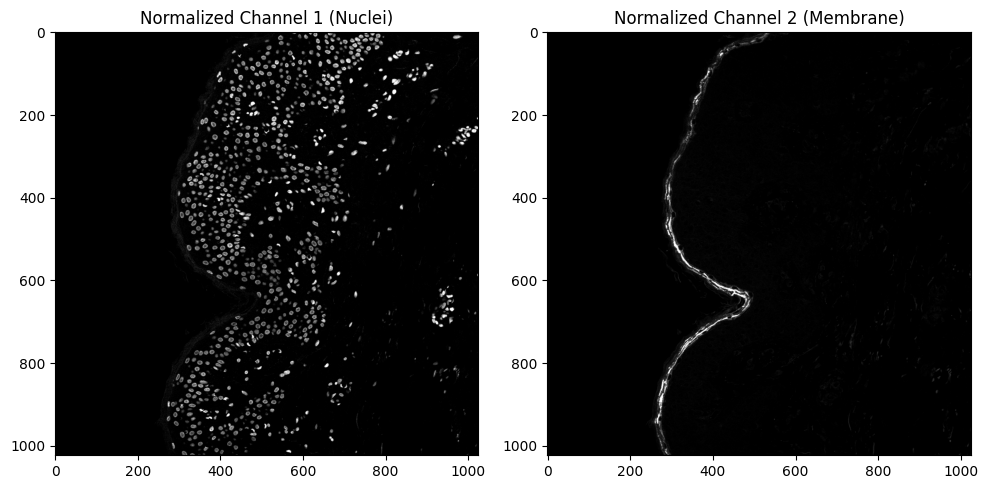

In [6]:
# prompt: normalize and plot both channels

from skimage.exposure import rescale_intensity

def normalize(image):
    """Normalizes the image intensity to the range [0, 1]."""
    normalized_image = rescale_intensity(image, in_range='image', out_range=(0, 1))
    return normalized_image

# Normalize channels
normalized_channel_1 = normalize(channel_1)
normalized_channel_2 = normalize(channel_2)

# Plot normalized channels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(normalized_channel_1, cmap='gray')
plt.title('Normalized Channel 1 (Nuclei)')

plt.subplot(1, 2, 2)
plt.imshow(normalized_channel_2, cmap='gray')
plt.title('Normalized Channel 2 (Membrane)')

plt.tight_layout()
plt.show()

Test contour detection

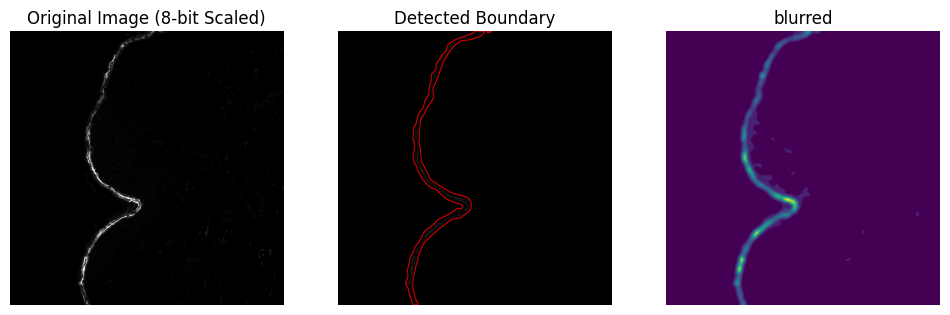

In [7]:
# @title
import cv2
import numpy as np
import matplotlib.pyplot as plt

# def detect_boundary(image_path):
# Load image
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
gray = channel_2

# Convert to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Normalize to 8-bit for processing
image_8bit = cv2.convertScaleAbs(gray, alpha=(255.0/65535.0))

# Apply Median Filter to reduce salt-and-pepper noise
median_filtered = cv2.medianBlur(image_8bit, 15)

# median_filtered = cv2.medianBlur(median_filtered, 5)

# median_filtered = cv2.medianBlur(median_filtered, 5)

# median_filtered = cv2.medianBlur(median_filtered, 5)

# median_filtered = cv2.medianBlur(median_filtered, 5)

# blurred = cv2.medianBlur(median_filtered, 5)

# Apply Gaussian Blur to further smooth the image
blurred = cv2.GaussianBlur(median_filtered, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)

# Apply Otsu's Thresholding (only works on 8-bit images)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# _, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_TRUNC)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert grayscale 16-bit image to RGB for visualization
image_rgb = cv2.cvtColor(image_8bit, cv2.COLOR_GRAY2RGB)
result = image_rgb.copy()
cv2.drawContours(result, contours, -1, (255, 0, 0), 2)

# Show the results
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(image_8bit, cmap='gray')
axes[0].set_title("Original Image (8-bit Scaled)")
axes[0].axis("off")

axes[1].imshow(result)
axes[1].set_title("Detected Boundary")
axes[1].axis("off")

axes[2].imshow(blurred)
axes[2].set_title("blurred")
axes[2].axis("off")

plt.show()

# Example usage:
# detect_boundary("path_to_your_image.jpg")



In [8]:
# @title
def detect_boundary(image_path):
  img = imread(image_path)

  #####################################################
  ## membrane
  channel_2 = img[1, :, :]

  #####################################################
  ## nuclei
  channel_1 = img[0, :, :]

  # def detect_boundary(image_path):
  # Load image
  # image = cv2.imread(image_path)
  # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
  gray = channel_2

  # Convert to grayscale
  # gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  # Normalize to 8-bit for processing
  image_8bit = cv2.convertScaleAbs(gray, alpha=(255.0/65535.0))

  # Apply Median Filter to reduce salt-and-pepper noise
  median_filtered = cv2.medianBlur(image_8bit, 15)

  # median_filtered = cv2.medianBlur(median_filtered, 5)

  # median_filtered = cv2.medianBlur(median_filtered, 5)

  # median_filtered = cv2.medianBlur(median_filtered, 5)

  # median_filtered = cv2.medianBlur(median_filtered, 5)

  # blurred = cv2.medianBlur(median_filtered, 5)

  # Apply Gaussian Blur to further smooth the image
  blurred = cv2.GaussianBlur(median_filtered, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)

  # Apply Otsu's Thresholding (only works on 8-bit images)
  _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  # _, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_TRUNC)

  # Find contours
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Convert grayscale 16-bit image to RGB for visualization
  image_rgb = cv2.cvtColor(image_8bit, cv2.COLOR_GRAY2RGB)
  result = image_rgb.copy()
  cv2.drawContours(result, contours, -1, (255, 0, 0), 2)

  # Show the results
  fig, axes = plt.subplots(1, 3, figsize=(12, 6))
  axes[0].imshow(image_8bit, cmap='gray')
  axes[0].set_title("Original Image (8-bit Scaled)")
  axes[0].axis("off")

  axes[1].imshow(result)
  axes[1].set_title("Detected Boundary")
  axes[1].axis("off")

  axes[2].imshow(blurred)
  axes[2].set_title("blurred")
  axes[2].axis("off")

  plt.show()


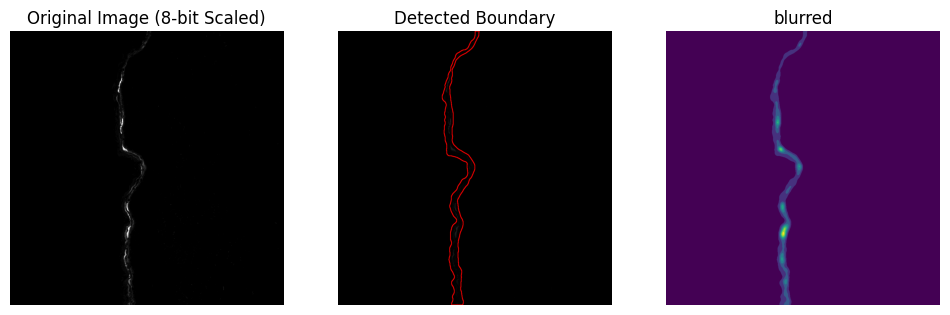

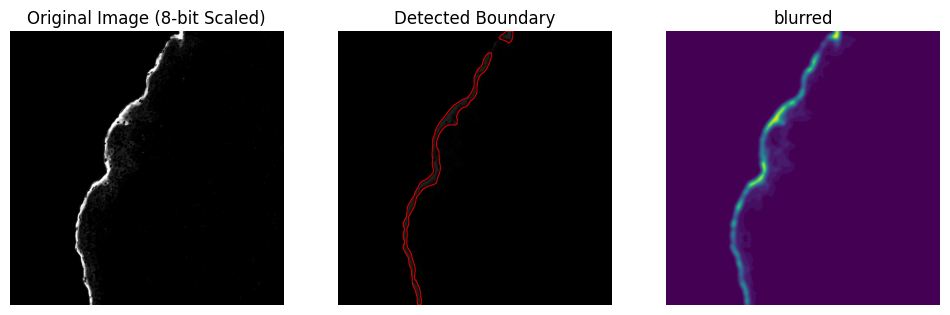

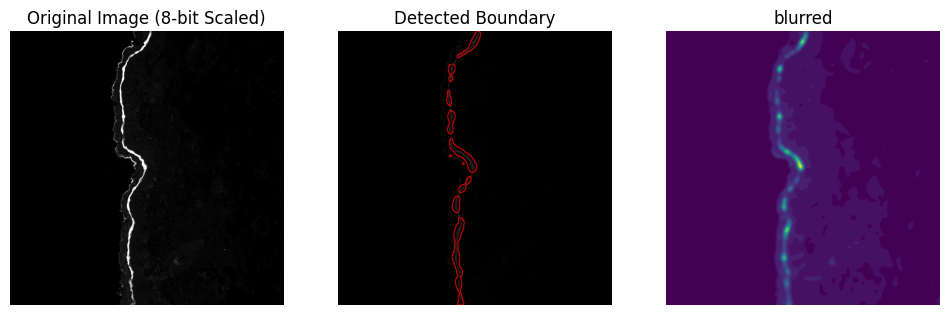

In [9]:
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_1.tif"
detect_boundary(image_path)
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_1.tif"
detect_boundary(image_path)
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_1.tif"
detect_boundary(image_path)

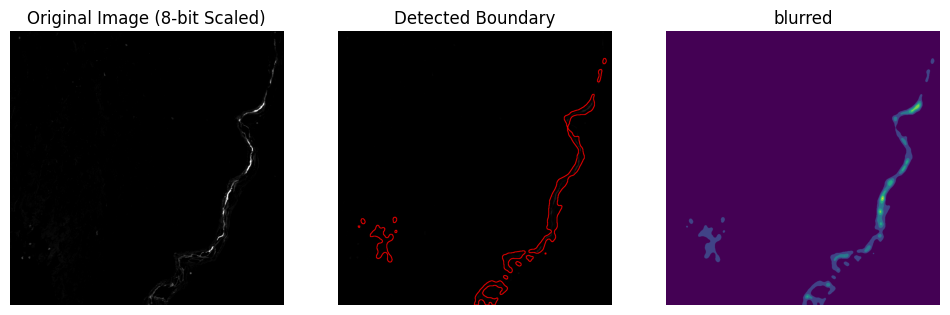

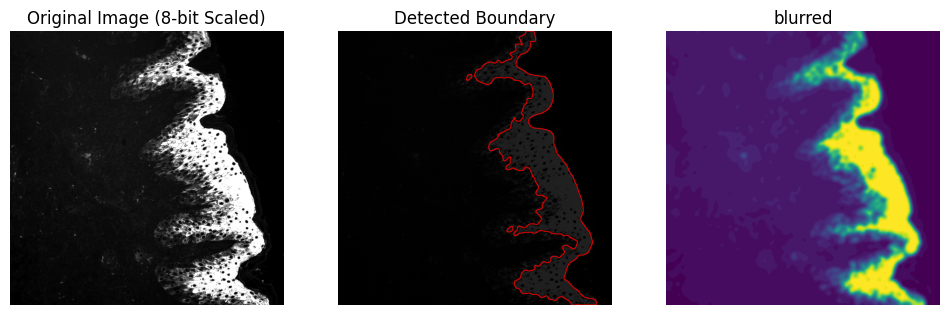

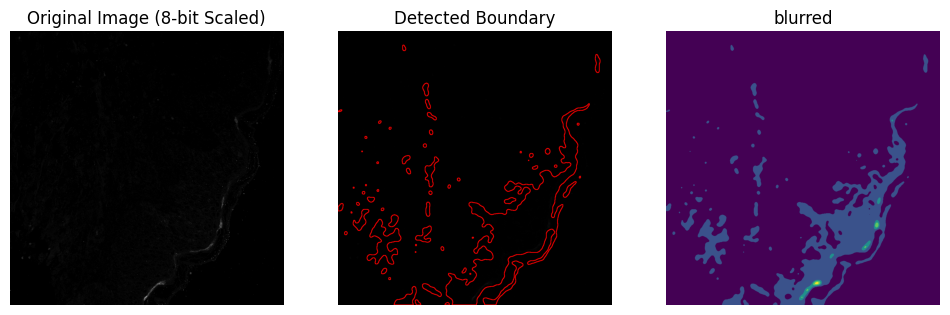

In [10]:
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_1.tif"
detect_boundary(image_path)
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2.tif"
detect_boundary(image_path)
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_1.tif"
detect_boundary(image_path)

In [16]:
# test function
# !todo: change output of function

from google.colab import drive
import os
from watermark import watermark
from skimage.io import imread
from skimage import filters
from skimage import measure
import pandas as pd
import numpy as np
from skimage.measure import regionprops_table
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from stardist.models import StarDist2D
from skimage.io import imsave
from skimage.measure import regionprops
from skimage.measure import label, regionprops
from skimage.exposure import rescale_intensity
import cv2
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.morphology import label, remove_small_objects


def detect_boundary(image_path):
  img = imread(image_path)

  #####################################################
  ## membrane
  channel_2 = img[1, :, :]

  #####################################################
  ## nuclei
  channel_1 = img[0, :, :]

  # def detect_boundary(image_path):
  # Load image
  # image = cv2.imread(image_path)
  # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
  gray = channel_2

  # Convert to grayscale
  # gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  # Normalize to 8-bit for processing
  image_8bit = cv2.convertScaleAbs(gray, alpha=(255.0/65535.0))

  # Apply Median Filter to reduce salt-and-pepper noise
  median_filtered = cv2.medianBlur(image_8bit, 15)

  # Apply Gaussian Blur to further smooth the image
  blurred = cv2.GaussianBlur(median_filtered, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
  blurred = cv2.GaussianBlur(blurred, (13, 13), 0)

  # Apply Otsu's Thresholding (only works on 8-bit images)
  _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  # _, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_TRUNC)

  # Find contours
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Convert grayscale 16-bit image to RGB for visualization
  image_rgb = cv2.cvtColor(image_8bit, cv2.COLOR_GRAY2RGB)
  result = image_rgb.copy()
  cv2.drawContours(result, contours, -1, (255, 0, 0), 2)

  # Show the results
  fig, axes = plt.subplots(1, 3, figsize=(12, 6))
  axes[0].imshow(image_8bit, cmap='gray')
  axes[0].set_title("Original Image (8-bit Scaled)")
  axes[0].axis("off")

  axes[1].imshow(result)
  axes[1].set_title("Detected Boundary")
  axes[1].axis("off")

  axes[2].imshow(blurred)
  axes[2].set_title("blurred")
  axes[2].axis("off")

  plt.show()


def remove_large_objects(binary_image, max_size):
    labeled_image = label(binary_image)
    sizes = np.bincount(labeled_image.ravel())  # Count sizes of objects
    mask = sizes <= max_size  # Keep only objects smaller than max_size
    mask[0] = 0  # Ensure background remains
    return mask[labeled_image]


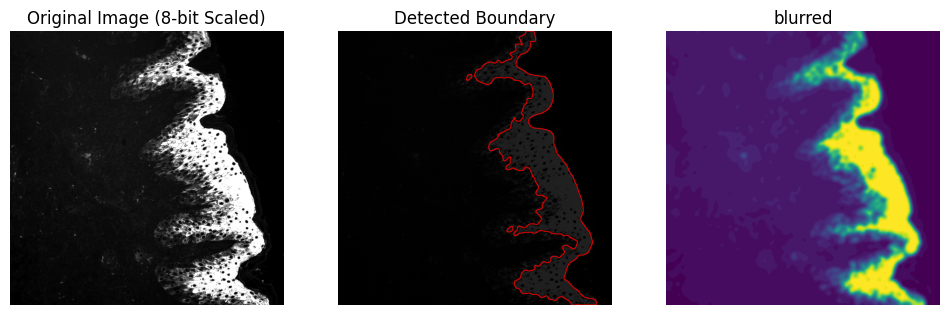

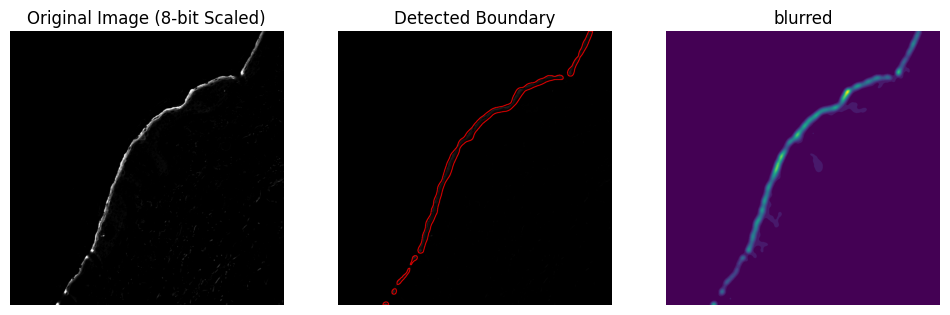

In [17]:
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2.tif"
detect_boundary(image_path)

image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_1.tif"
detect_boundary(image_path)

### Pattern/continuity

### Gradient from membrane

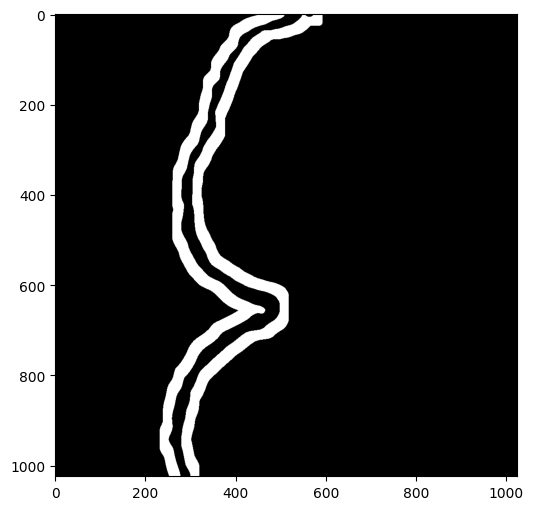

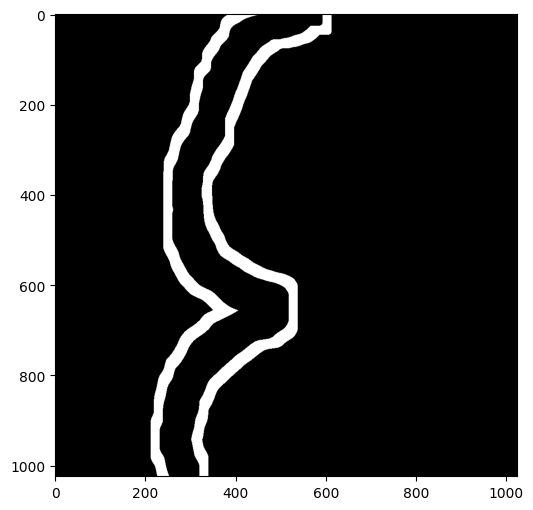

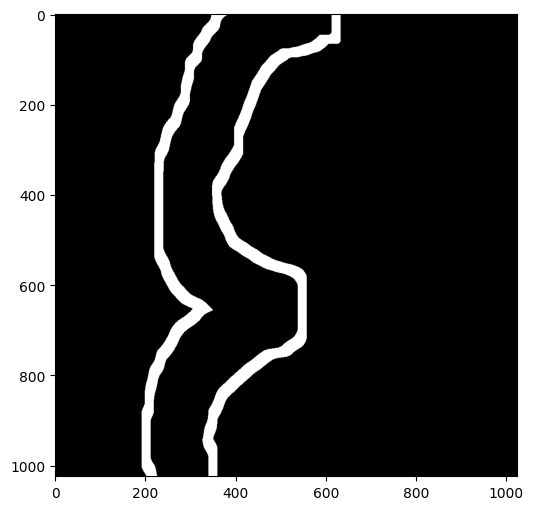

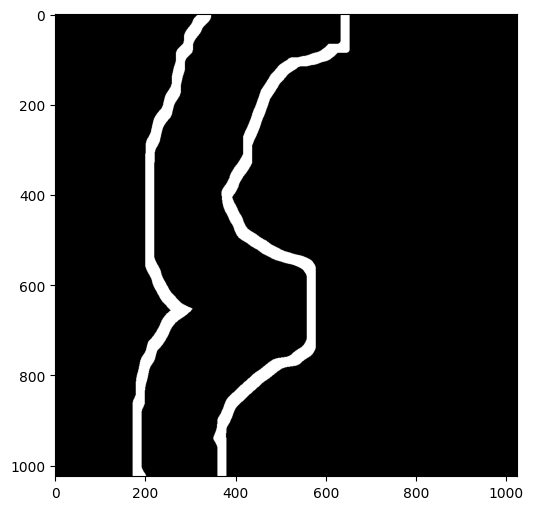

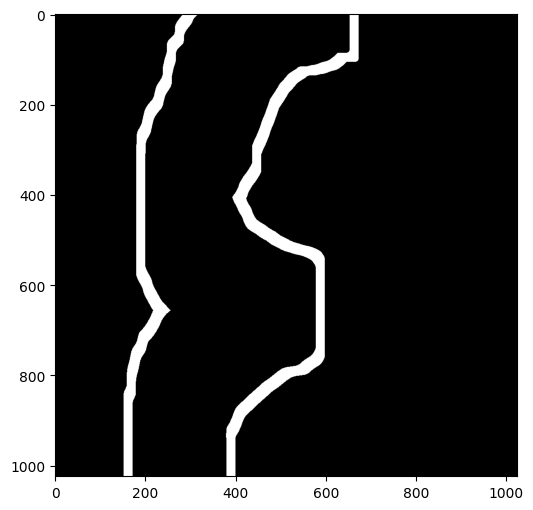

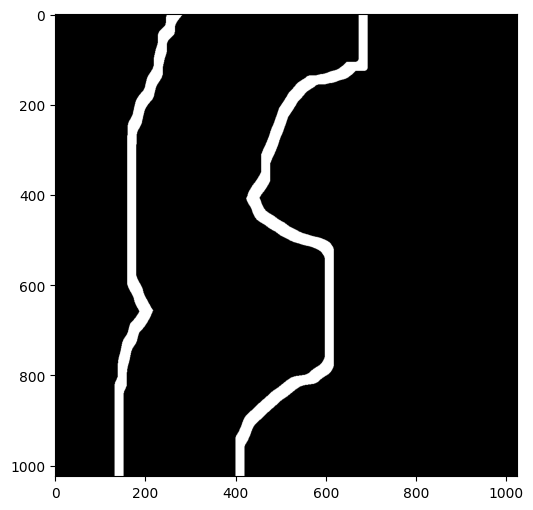

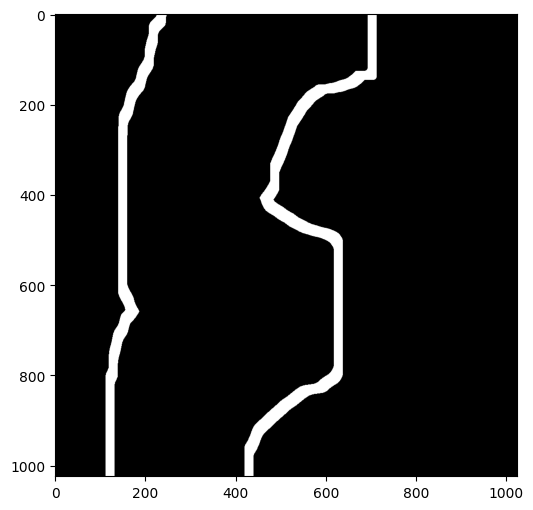

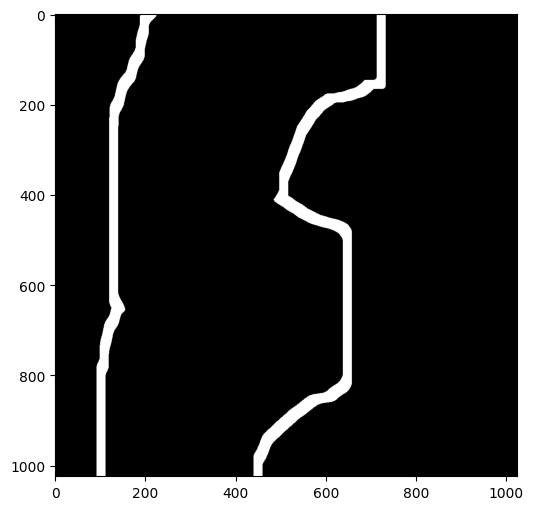

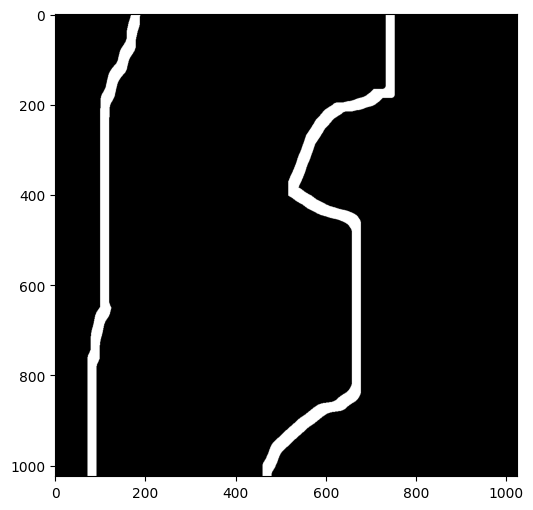

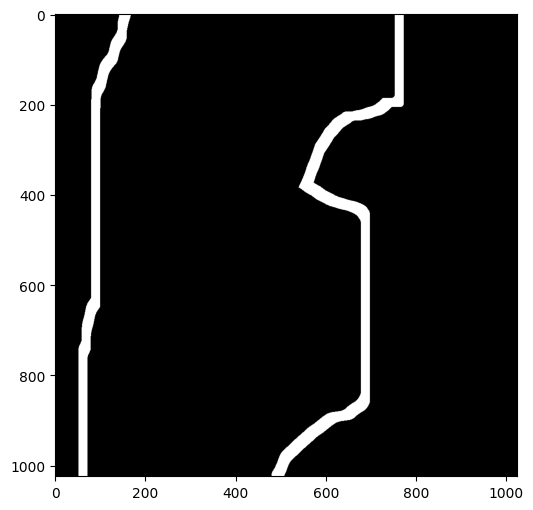

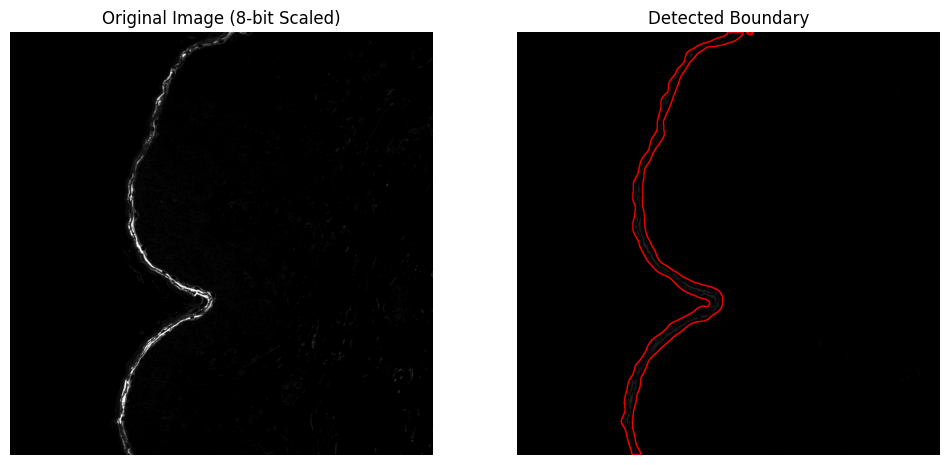

Expansion Step (pixels) - Brightness in Regions:
Step 60 pixels:
  Region 1: 25th=0.00, 50th=0.00, 75th=42.00, 95th=388.00
  Region 2: 25th=43.00, 50th=95.00, 75th=160.00, 95th=287.00
Step 120 pixels:
  Region 1: 25th=0.00, 50th=0.00, 75th=0.00, 95th=0.00
  Region 2: 25th=26.00, 50th=69.00, 75th=129.00, 95th=238.00
Step 180 pixels:
  Region 1: 25th=0.00, 50th=0.00, 75th=0.00, 95th=0.00
  Region 2: 25th=19.00, 50th=60.00, 75th=119.00, 95th=231.00
Step 240 pixels:
  Region 1: 25th=0.00, 50th=0.00, 75th=0.00, 95th=0.00
  Region 2: 25th=10.00, 50th=46.00, 75th=105.00, 95th=225.00
Step 300 pixels:
  Region 1: 25th=0.00, 50th=0.00, 75th=0.00, 95th=0.00
  Region 2: 25th=4.00, 50th=39.00, 75th=95.00, 95th=212.00
Step 360 pixels:
  Region 1: 25th=0.00, 50th=0.00, 75th=0.00, 95th=0.00
  Region 2: 25th=4.00, 50th=36.00, 75th=86.00, 95th=199.00
Step 420 pixels:
  Region 1: 25th=0.00, 50th=0.00, 75th=0.00, 95th=0.00
  Region 2: 25th=5.00, 50th=35.00, 75th=82.00, 95th=185.00
Step 480 pixels:
  Regio

In [11]:
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1.tif"
img = imread(image_path)

#####################################################
## membrane
channel_2 = img[1, :, :]

#####################################################
## nuclei
channel_1 = img[0, :, :]

gray = channel_2

# Convert to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Normalize to 8-bit for processing
image_8bit = cv2.convertScaleAbs(gray, alpha=(255.0/65535.0))

# Apply Median Filter to reduce salt-and-pepper noise
median_filtered = cv2.medianBlur(image_8bit, 15)

# median_filtered = cv2.medianBlur(median_filtered, 5)

# median_filtered = cv2.medianBlur(median_filtered, 5)

# median_filtered = cv2.medianBlur(median_filtered, 5)

# median_filtered = cv2.medianBlur(median_filtered, 5)

# blurred = cv2.medianBlur(median_filtered, 5)

# Apply Gaussian Blur to further smooth the image
blurred = cv2.GaussianBlur(median_filtered, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)
blurred = cv2.GaussianBlur(blurred, (13, 13), 0)

# Apply Otsu's Thresholding (only works on 8-bit images)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# _, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_TRUNC)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Convert grayscale 16-bit image to RGB for visualization
image_rgb = cv2.cvtColor(image_8bit, cv2.COLOR_GRAY2RGB)
result = image_rgb.copy()
cv2.drawContours(result, contours, -1, (255, 0, 0), 2)

# Expand the mask outward from the detected boundary
mask = np.zeros_like(thresh)
cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

step_size = 60
max_steps = 10  # Number of steps to expand in each direction
brightness_values = []
start = True

for i in range(1, max_steps + 1):
    # Expand outward by dilation
    kernel = np.ones((3, 3), np.uint8)
    expanded_mask = cv2.dilate(mask, kernel, iterations=i * step_size // 3)

    # Get the new region (difference between expanded mask and original mask)
    if start:
      expansion_region = cv2.bitwise_xor(expanded_mask, mask)
      old_mask = expanded_mask
    else:
      expansion_region = cv2.bitwise_xor(expanded_mask, old_mask)
      old_mask = expanded_mask

    fig, axes = plt.subplots(1, 1, figsize=(6, 6))
    axes.imshow(expansion_region, cmap='gray')

    # Find separate connected regions within the expansion region
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(expansion_region, connectivity=8)

    region_brightness = []
    for label in range(1, num_labels):  # Skip background (label 0)
        region_mask = (labels == label).astype(np.uint8) * 255
        brightness_values_list = channel_2[labels == label].flatten()

        percentiles = np.percentile(brightness_values_list, [25, 50, 75, 95])
        region_brightness.append((label, percentiles))

    brightness_values.append((i * step_size, region_brightness))
    start = False

# Show the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_8bit, cmap='gray')
axes[0].set_title("Original Image (8-bit Scaled)")
axes[0].axis("off")

axes[1].imshow(result)
axes[1].set_title("Detected Boundary")
axes[1].axis("off")

plt.show()

# Print brightness percentiles for each expansion step
print("Expansion Step (pixels) - Brightness in Regions:")
for step, regions in brightness_values:
    print(f"Step {step} pixels:")
    for region_id, percentiles in regions:
        print(f"  Region {region_id}: 25th={percentiles[0]:.2f}, 50th={percentiles[1]:.2f}, 75th={percentiles[2]:.2f}, 95th={percentiles[3]:.2f}")

# Example usage:
# detect_boundary("path_to_your_image.tif")

# for i in range(1, max_steps + 1):
#     # Expand outward by dilation
#     kernel = np.ones((3, 3), np.uint8)
#     expanded_mask = cv2.dilate(mask, kernel, iterations=i * step_size // 3)

#     # Get the new region (difference between expanded mask and original mask)
#     if start:
#       expansion_region = cv2.bitwise_xor(expanded_mask, mask)
#       old_mask = mask
#     else:
#       expansion_region = cv2.bitwise_xor(expanded_mask, old_mask)
#       old_mask = expanded_mask

#     fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#     axes[0].imshow(expansion_region, cmap='gray')
#     axes[0].axis("off")

#     # Measure brightness in the expansion region
#     brightness = cv2.mean(channel_2, mask=expansion_region)[0]
#     brightness_values.append((i * step_size, brightness))
#     start = False

# # Show the results
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# axes[0].imshow(image_8bit, cmap='gray')
# axes[0].set_title("Original Image (8-bit Scaled)")
# axes[0].axis("off")

# axes[1].imshow(result)
# axes[1].set_title("Detected Boundary")
# axes[1].axis("off")

# plt.show()

# # Print brightness values for each expansion step
# print("Expansion Step (pixels) - Brightness:")
# for step, brightness in brightness_values:
#     print(f"{step} - {brightness}")

# # Example usage:
# # detect_boundary("path_to_your_image.tif")

### Bright spots

Number of remaining objects: 24


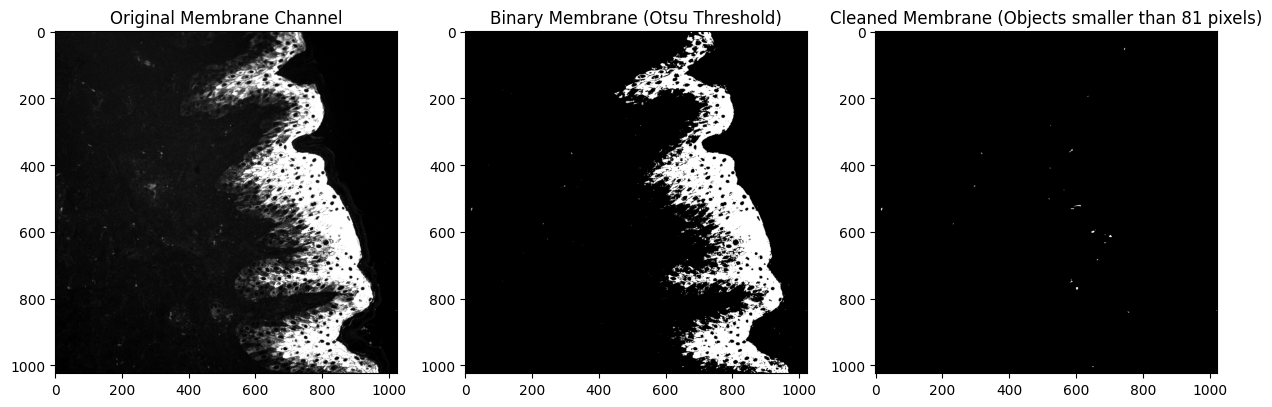

In [15]:
## Bright spots
# image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2.tif"

import numpy as np
from skimage.filters import threshold_otsu
from skimage.io import imread
from skimage.measure import label
from skimage.morphology import label, remove_small_objects


def remove_large_objects(binary_image, max_size):
    labeled_image = label(binary_image)
    sizes = np.bincount(labeled_image.ravel())  # Count sizes of objects
    mask = sizes <= max_size  # Keep only objects smaller than max_size
    mask[0] = 0  # Ensure background remains
    return mask[labeled_image]


image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2.tif"
# image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_1.tif"

img = imread(image_path)

#####################################################
## membrane
channel_2 = img[1, :, :]

#####################################################
## nuclei
channel_1 = img[0, :, :]

# removes small spots, dont use
# channel_2_blurred = cv2.GaussianBlur(channel_2, (13, 13), 0)

# Threshold the membrane channel using Otsu's method
thresh = threshold_otsu(channel_2)
binary_membrane = channel_2 > thresh

# #dilate and erode to connect parts that are too close to membrane
# # Expand outward by dilation
# kernel = np.ones((3, 3), np.uint8)
# expanded_mask = cv2.dilate(binary_membrane, kernel)

# # Erode mask back
# erode_mask = cv2.erode(expanded_mask, kernel)

# Convert binary mask to uint8 for OpenCV
binary_membrane_uint8 = (binary_membrane * 255).astype(np.uint8)

# Define kernel
kernel = np.ones((5, 5), np.uint8)

# Expand outward by dilation
expanded_mask = cv2.dilate(binary_membrane_uint8, kernel)
expanded_mask = cv2.dilate(expanded_mask, kernel)
expanded_mask = cv2.dilate(expanded_mask, kernel)

# Erode mask back
eroded_mask = cv2.erode(expanded_mask, kernel)
eroded_mask = cv2.erode(eroded_mask, kernel)
eroded_mask = cv2.erode(eroded_mask, kernel)

# Convert back to boolean if needed
final_mask = eroded_mask > 0

# Remove large objects (connected components) larger than 81 pixels
cleaned_membrane = remove_large_objects(
    final_mask, max_size=81
)  # min_size is exclusive, so use 51 to remove objects > 50

# Remove too small objects
cleaned_membrane = remove_small_objects(cleaned_membrane, min_size=3)

# Optional: Label the remaining objects (if you need to analyze them individually)
labeled_membrane = label(cleaned_membrane)

# Example: Count the remaining objects
num_objects = np.max(labeled_membrane)
print(f"Number of remaining objects: {num_objects}")

# Example: Display the results (if you have matplotlib installed)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(channel_2, cmap="gray")
plt.title("Original Membrane Channel")

plt.subplot(1, 3, 2)
plt.imshow(binary_membrane, cmap="gray")
plt.title("Binary Membrane (Otsu Threshold)")

plt.subplot(1, 3, 3)
plt.imshow(cleaned_membrane, cmap="gray")
plt.title("Cleaned Membrane (Objects smaller than 3 pixels)")

plt.show()

In [19]:
# test function
# !todo: change output of function

import matplotlib.pyplot as plt
import numpy as np
def analyze_bright_spots(image_path):
  """
  Analyzes bright spots in a given image, specifically targeting the membrane channel.

  Args:
      image_path: Path to the multi-channel image file (e.g., a TIFF file).

  Returns:
      None: The function displays the results of the analysis, including:
          - The original membrane channel.
          - The binary membrane obtained after Otsu's thresholding.
          - The cleaned membrane after removing small and large objects.
  """

  img = imread(image_path)
  channel_2 = img[1, :, :]  # Membrane channel

  # Threshold the membrane channel using Otsu's method
  thresh = threshold_otsu(channel_2)
  binary_membrane = channel_2 > thresh

  # Convert binary mask to uint8 for OpenCV
  binary_membrane_uint8 = (binary_membrane * 255).astype(np.uint8)

  # Define kernel
  kernel = np.ones((5, 5), np.uint8)

  # Expand outward by dilation
  expanded_mask = cv2.dilate(binary_membrane_uint8, kernel)
  expanded_mask = cv2.dilate(expanded_mask, kernel)
  expanded_mask = cv2.dilate(expanded_mask, kernel)

  # Erode mask back
  eroded_mask = cv2.erode(expanded_mask, kernel)
  eroded_mask = cv2.erode(eroded_mask, kernel)
  eroded_mask = cv2.erode(eroded_mask, kernel)

  # Convert back to boolean if needed
  final_mask = eroded_mask > 0

  def remove_large_objects(binary_image, max_size):
      labeled_image = label(binary_image)
      sizes = np.bincount(labeled_image.ravel())  # Count sizes of objects
      mask = sizes <= max_size  # Keep only objects smaller than max_size
      mask[0] = 0  # Ensure background remains
      return mask[labeled_image]

  # Remove large objects (connected components) larger than 81 pixels
  cleaned_membrane = remove_large_objects(
      final_mask, max_size=81
  )  # min_size is exclusive, so use 51 to remove objects > 50

  # Remove too small objects
  cleaned_membrane = remove_small_objects(cleaned_membrane, min_size=3)

  # Example: Display the results (if you have matplotlib installed)
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 3, 1)
  plt.imshow(channel_2, cmap="gray")
  plt.title("Original Membrane Channel")

  plt.subplot(1, 3, 2)
  plt.imshow(binary_membrane, cmap="gray")
  plt.title("Binary Membrane (Otsu Threshold)")

  plt.subplot(1, 3, 3)
  plt.imshow(cleaned_membrane, cmap="gray")
  plt.title("Cleaned Membrane (Objects smaller than 3 pixels)")

  plt.show()


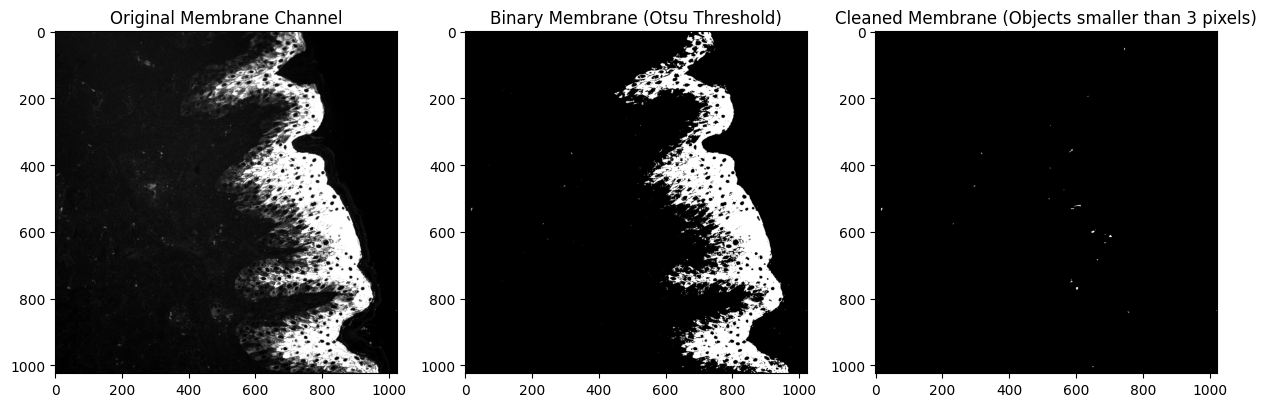

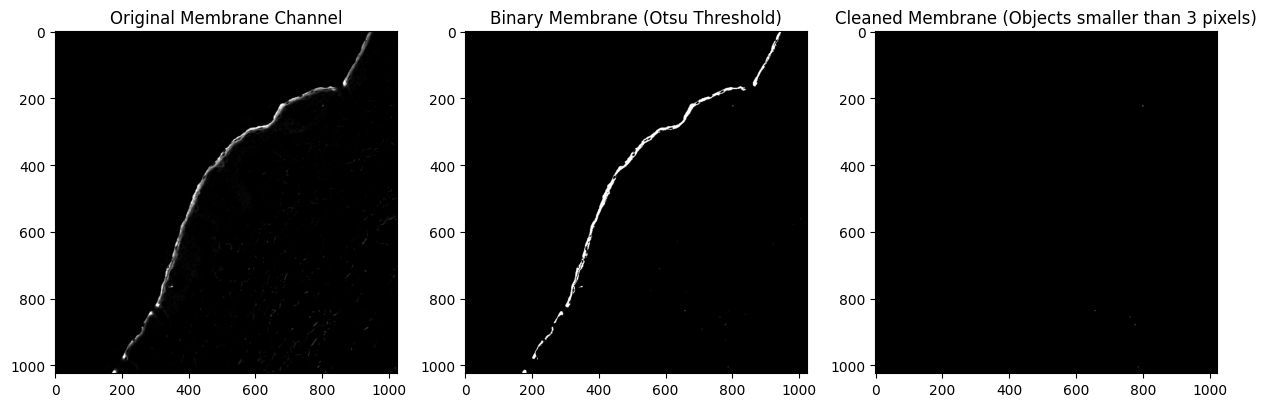

In [20]:
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2.tif"
analyze_bright_spots(image_path)
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_1.tif"
analyze_bright_spots(image_path)

## Continuity of label

### What This Measures

| Metric             | Meaning                                    | Higher Value Indicates             |
|--------------------|--------------------------------------------|------------------------------------|
| **Brightness Std Dev** | Variation in intensity along the membrane | Discontinuous brightness           |
| **Mean Gradient**     | Sharpness of membrane edges               | More abrupt changes               |
| **Number of Holes**   | Internal gaps in membrane                  | More fragmented membrane          |
| **Jaggedness**        | Perimeter-to-area ratio                   | Irregular edges                   |
| **Solidity**          | Ratio of filled area to convex hull        | Fragmented membrane if lower      |
| **Number of Fragments** | Disconnected membrane parts              | More broken structure             |
| **Thickness Variation** | Std dev of distance transform            | Uneven membrane width             |

In [28]:
import cv2
import numpy as np
from scipy.ndimage import distance_transform_edt
from skimage.filters import sobel, threshold_otsu
from skimage.measure import perimeter, regionprops
from skimage.morphology import label, skeletonize

def compute_brightness_continuity(image, mask):
    """
    Measures the standard deviation of pixel intensity along the skeletonized mask.

    Args:
        image (ndarray): Grayscale image (membrane channel).
        mask (ndarray): Binary mask of the membrane.

    Returns:
        float: Standard deviation of brightness along the membrane skeleton.
    """
    skeleton = skeletonize(mask)
    intensities = image[skeleton]
    return np.std(intensities)


def compute_gradient(image, mask):
    """
    Computes the mean gradient magnitude within the mask.

    Args:
        image (ndarray): Grayscale image (membrane channel).
        mask (ndarray): Binary mask of the membrane.

    Returns:
        float: Mean gradient magnitude.
    """
    gradient = sobel(image)
    return np.mean(gradient[mask])


def count_holes(mask):
    """
    Counts the number of holes inside the membrane.

    Args:
        mask (ndarray): Binary mask of the membrane.

    Returns:
        int: Number of holes.
    """
    # label() returns only the labeled array when called with default arguments.
    labeled_array = label(~mask)
    # To get the number of labels (objects), find the maximum label value.
    num_holes = np.max(labeled_array)
    return num_holes


def compute_jaggedness(mask):
    """
    Computes the perimeter-to-area ratio as a measure of jaggedness.

    Args:
        mask (ndarray): Binary mask of the membrane.

    Returns:
        float: Jaggedness metric (higher = more irregular).
    """
    area = np.sum(mask)
    perim = perimeter(mask)
    return perim / area if area > 0 else 0


def compute_solidity(mask):
    """
    Computes solidity (compactness) of the membrane.

    Args:
        mask (ndarray): Binary mask of the membrane.

    Returns:
        float: Solidity (1 = perfectly filled shape, <1 = fragmented).
    """
    props = regionprops(mask.astype(int))
    return props[0].solidity if props else 0


def count_fragments(mask):
    """
    Counts the number of separate membrane fragments.

    Args:
        mask (ndarray): Binary mask of the membrane.

    Returns:
        int: Number of connected components.
    """
    _, num_fragments = label(mask, return_num=True)
    return num_fragments


def compute_thickness_variation(mask):
    """
    Computes the standard deviation of membrane thickness.

    Args:
        mask (ndarray): Binary mask of the membrane.

    Returns:
        float: Standard deviation of membrane thickness.
    """
    thickness = distance_transform_edt(mask)
    return np.std(thickness)

In [43]:
def prep_for_membrane_analysis(image_path, vis: bool = False):

  img = imread(image_path)
  channel_2 = img[1, :, :]  # Membrane channel

  # Threshold the membrane channel using Otsu's method
  thresh = threshold_otsu(channel_2)
  binary_membrane = channel_2 > thresh

  # Convert binary mask to uint8 for OpenCV
  binary_membrane_uint8 = (binary_membrane * 255).astype(np.uint8)

  # Convert back to boolean if needed
  final_mask = binary_membrane_uint8 > 0

  # Remove too small objects
  cleaned_membrane = remove_small_objects(final_mask, min_size=51)

  if vis:
    # Example: Display the results (if you have matplotlib installed)
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(channel_2, cmap="gray")
    plt.title("Original Membrane Channel")

    plt.subplot(1, 2, 2)
    plt.imshow(cleaned_membrane, cmap="gray")
    plt.title("Binary Mask")

    plt.show()

  return channel_2, cleaned_membrane

def analyze_membrane_continuity(image, mask):
  """
  Computes various metrics to assess membrane continuity.

  Args:
      image (ndarray): The original membrane channel image.
      mask (ndarray): The binary mask of the cleaned membrane.

  Returns:
      dict: A dictionary containing the computed metrics.
  """

  metrics = {}
  metrics["Brightness_Std_Dev"] = compute_brightness_continuity(image, mask)
  metrics["Mean_Gradient"] = compute_gradient(image, mask)
  metrics["Number_of_Holes"] = count_holes(mask)
  metrics["Jaggedness"] = compute_jaggedness(mask)
  metrics["Solidity"] = compute_solidity(mask)
  metrics["Number_of_Fragments"] = count_fragments(mask)
  metrics["Thickness_Variation"] = compute_thickness_variation(mask)

  return pd.DataFrame([metrics])



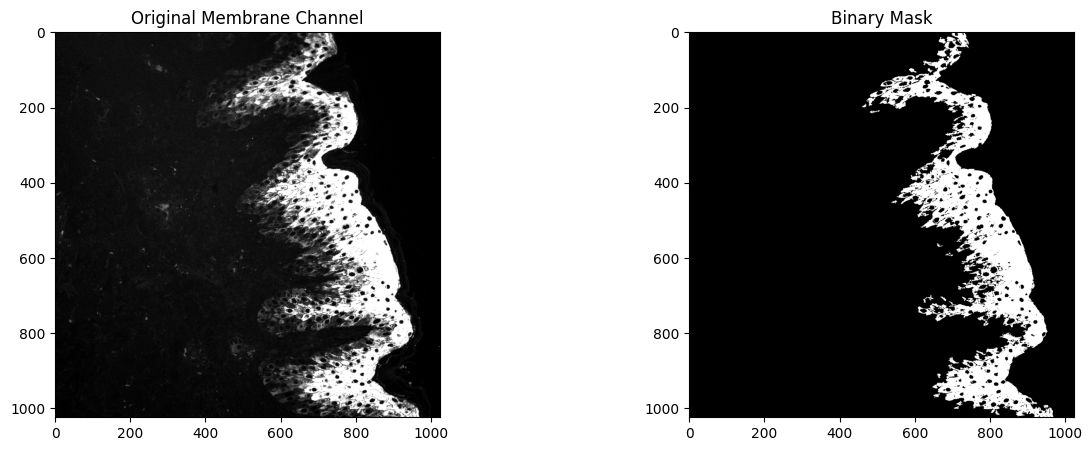

Brightness_Std_Dev  Mean_Gradient  Number_of_Holes  Jaggedness  Solidity  \
0         1397.589174       0.013838              728    0.192321  0.383022   

   Number_of_Fragments  Thickness_Variation  
0                   30             2.050941

In [44]:
# example

# Example usage:
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2.tif"
# image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_1.tif"

channel_2, cleaned_membrane = prep_for_membrane_analysis(image_path,vis=True)

image, mask = prep_for_membrane_analysis(image_path)
metrics = analyze_membrane_continuity(channel_2, cleaned_membrane)
metrics



## Code

In [ ]:
from stardist.models import StarDist2D

# prints a list of available models
StarDist2D.from_pretrained()

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
5320433/5320433 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


Text(0.5, 1.0, 'prediction + input overlay')

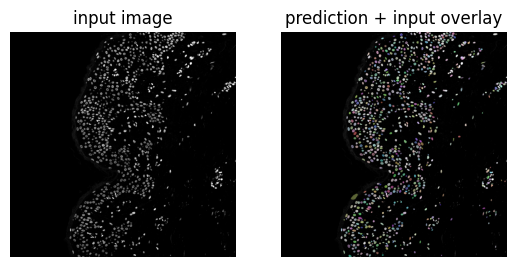

In [ ]:
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

img = channel_1

labels, _ = model.predict_instances(normalize(img))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")

In [ ]:
image_path = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1.tif"
summary_df_ch1, summary_df_ch2, specific_df = process_image(image_path)

merged_df = pd.merge(summary_df_ch1, summary_df_ch2, left_index=True, right_index=True, suffixes=('_nuclei', '_membrane'))
merged_df = pd.concat([merged_df, specific_df], axis=1)
merged_df

Image Size: (2, 1024)
Number of Channels: 2


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_mask.tiff
nuclei_under_membrane: 22
percentage_nuclei_pixels: 1.9593280760505563
Total membrane pixel count: 20206
median_thickness: 22.36924

area_mean_nuclei  area_std_nuclei  area_min_nuclei  area_max_nuclei  \
0         76.981289        32.835979             23.0            491.0   

   area_median_nuclei  area_count_nuclei  perimeter_mean_nuclei  \
0                74.0                962              30.603366   

   perimeter_std_nuclei  perimeter_min_nuclei  perimeter_max_nuclei  ...  \
0              6.933892             15.313708             90.911688  ...   

   quartiles-2_max_membrane  quartiles-2_median_membrane  \
0                    3285.0                       2464.0   

   quartiles-2_count_membrane  nuclei_under_membrane  \
0                           9                     22   

   percentage_nuclei_pixels  membrane_pixel_count  median_thickness  \
0                  1.959328                 20206         22.369245   

   min_thickness  max_thickness  membrane_brightness_std_dev  
0       8.214724     143.410733                  2327.342884  

[1 rows x 163 columns]

In [ ]:
# process all images in subfolders keep image names in output table
%timeit
from datetime import datetime



def process_images_in_subfolders(root_folder):
    all_results = []
    for subdir, _, files in os.walk(root_folder):
        for file in files:
            if file.lower().endswith(('.tif', '.tiff')):  # Add more extensions if needed
                image_path = os.path.join(subdir, file)
                print("------------------------------------")
                print("------------------------------------")
                print(f"Processing: {image_path}")  # Print the current image being processed
                print("------------------------------------")
                results = process_image(image_path)
                if results:
                    summary_df_ch1, summary_df_ch2, specific_df = results
                    merged_df = pd.merge(summary_df_ch1, summary_df_ch2, left_index=True, right_index=True, suffixes=('_nuclei', '_membrane')) #, suffixes=('_channel1', '_channel2'))
                    merged_df = pd.concat([merged_df, specific_df], axis=1)
                    merged_df['image_name'] = file # Add image name column
                    all_results.append(merged_df)

    if all_results:
        final_df = pd.concat(all_results, ignore_index=True)
        return final_df
    else:
        return None

# Example usage:
root_folder = "/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples"  # Replace with your root folder
results_df = process_images_in_subfolders(root_folder)

if results_df is not None:
    #print(results_df)
    now = datetime.now()
    date_time_string = now.strftime("%Y-%m-%d-%H-%M")

    # Save the results to a CSV file
    results_df.to_csv(f"/content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/{date_time_string}_image_analysis_results_new-features_new-names.csv", index=False)
else:
    print("No images found or processed successfully.")

------------------------------------
------------------------------------
Processing: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_1.tif
------------------------------------
Image Size: (2, 1024)
Number of Channels: 2


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_1_mask.tiff
nuclei_under_membrane: 54
percentage_nuclei_pixels: 10.051552458746263
Total membrane pixel count: 49597
median_thickness: 21.65657

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_2_mask.tiff
nuclei_under_membrane: 41
percentage_nuclei_pixels: 4.450992287026605
Total membrane pixel count: 30018
median_thickness: 18.299234

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_3_mask.tiff
nuclei_under_membrane: 39
percentage_nuclei_pixels: 4.606487098600663
Total membrane pixel count: 34297
median_thickness: 14.450303987687134
Membrane brightness standard deviation: 2910.3506118330424
------------------------------------
------------------------------------
Processing: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Loricrin/Healthy16_Loricrin_1_label.tiff
------------------------------------
Image Size: (1024, 1024)
Number of Channels: 1024
Error: Number of channels is not 2.
------------------------------------
------------------------------------
Processing: /content/gdrive/Shareddri

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_2_mask.tiff
nuclei_under_membrane: 62
percentage_nuclei_pixels: 7.383575506463254
Total membrane pixel count: 29064
median_thickness: 100.01334474161486
Membrane brightness standard deviation: 2722.1323005601907
------------------------------------
------------------------------------
Processing: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_3.tif
------------------------------------
Image Size: (2, 1024)
Number of Channels: 2


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_3_mask.tiff
nuclei_under_membrane: 45
percentage_nuclei_pixels: 5.282875705410916
Total membrane pixel count: 23698
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Involucrin/Healthy16_Involucrin_1_mask.tiff
nuclei_under_membrane: 48
percentage_nuclei_pixels: 5.2507641797803695
Total membrane pixel count: 20440
median_thi

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_3_mask.tiff
nuclei_under_membrane: 29
percentage_nuclei_pixels: 2.857316185391895
Total membrane pixel count: 15250
median_thickness: 3

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_2_mask.tiff
nuclei_under_membrane: 35
percentage_nuclei_pixels: 3.2359823208250282
Total membrane pixel count: 15864
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 16/Filaggrin/Healthy16_Filaggrin_1_mask.tiff
nuclei_under_membrane: 34
percentage_nuclei_pixels: 4.587933429062405
Total membrane pixel count: 16376
median_thickness: 1

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_1_mask.tiff
nuclei_under_membrane: 54
percentage_nuclei_pixels: 7.956093673684481
Total membrane pixel count: 33253
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_3_mask.tiff
nuclei_under_membrane: 58
percentage_nuclei_pixels: 9.209021601016518
Total membrane pixel count: 32619
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Involucrin/Healthy17_Involucrin_2_mask.tiff
nuclei_under_membrane: 64
percentage_nuclei_pixels: 8.442767167299897
Total membrane pixel count: 35659
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_3_mask.tiff
nuclei_under_membrane: 16
percentage_nuclei_pixels: 2.515046740939941
Total membrane pixel count: 19605
median_thickness: 8

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_1_mask.tiff
nuclei_under_membrane: 12
percentage_nuclei_pixels: 1.1995380334925718
Total membrane pixel count: 16427
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Filaggrin/Healthy17_Filaggrin_2_mask.tiff
nuclei_under_membrane: 21
percentage_nuclei_pixels: 1.650639146241351
Total membrane pixel count: 13431
median_thickness: 3

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_3_mask.tiff
nuclei_under_membrane: 23
percentage_nuclei_pixels: 3.2321680112690485
Total membrane pixel count: 21831
median_thickness: 166.7216

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_2_mask.tiff
nuclei_under_membrane: 29
percentage_nuclei_pixels: 3.4273484226574413
Total membrane pixel count: 20280
median_thickness: 44.46730

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 17/Loricrin/Healthy17_Loricrin_1_mask.tiff
nuclei_under_membrane: 17
percentage_nuclei_pixels: 2.233713055803454
Total membrane pixel count: 17714
median_thickness: 46.575595

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_3_mask.tiff
nuclei_under_membrane: 406
percentage_nuclei_pixels: 45.404393409885174
Total membrane pixel count: 137902
median_thickness

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_1_mask.tiff
nuclei_under_membrane: 677
percentage_nuclei_pixels: 61.202952199204475
Total membrane pixel count: 198040
median_thickness

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Filaggrin/Healthy18_Filaggrin_2_mask.tiff
nuclei_under_membrane: 510
percentage_nuclei_pixels: 50.70275535763985
Total membrane pixel count: 127193
median_thickness:

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_3_mask.tiff
nuclei_under_membrane: 53
percentage_nuclei_pixels: 7.436426500111533
Total membrane pixel count: 23999
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_1_mask.tiff
nuclei_under_membrane: 57
percentage_nuclei_pixels: 7.059276531114296
Total membrane pixel count: 21449
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Involucrin/Healthy18_Involucrin_2_mask.tiff
nuclei_under_membrane: 37
percentage_nuclei_pixels: 5.275118597846775
Total membrane pixel count: 23803
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_3_mask.tiff
nuclei_under_membrane: 12
percentage_nuclei_pixels: 1.2805791313030455
Total membrane pixel count: 8298
median_thickness: 28.457899

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_1_mask.tiff
nuclei_under_membrane: 781
percentage_nuclei_pixels: 76.50426505414664
Total membrane pixel count: 225273
median_thickness: 14.1385

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 18/Loricrin/Healthy18_Loricrin_2_mask.tiff
nuclei_under_membrane: 359
percentage_nuclei_pixels: 39.09221634659987
Total membrane pixel count: 92448
median_thickness: 10.49413

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_3_mask.tiff
nuclei_under_membrane: 13
percentage_nuclei_pixels: 2.231344237158191
Total membrane pixel count: 19487
median_thickness: 36.441581

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_2_mask.tiff
nuclei_under_membrane: 23
percentage_nuclei_pixels: 2.2687890388877694
Total membrane pixel count: 21586
median_thickness: 38.76109

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Filaggrin/Healthy1_Filaggrin_1_mask.tiff
nuclei_under_membrane: 22
percentage_nuclei_pixels: 1.9593280760505563
Total membrane pixel count: 20206
median_thickness: 22.36924

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_3_mask.tiff
nuclei_under_membrane: 36
percentage_nuclei_pixels: 3.232614327715192
Total membrane pixel count: 19834
median_thickness: 3

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_2_mask.tiff
nuclei_under_membrane: 78
percentage_nuclei_pixels: 6.934413982024405
Total membrane pixel count: 43783
median_thickness: 1

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Involucrin/Healthy1_Involucrin_1_mask.tiff
nuclei_under_membrane: 66
percentage_nuclei_pixels: 5.787305013244383
Total membrane pixel count: 30472
median_thickness: 2

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_1_mask.tiff
nuclei_under_membrane: 14
percentage_nuclei_pixels: 0.9047207518634547
Total membrane pixel count: 8249
median_thickness: 31.22981734283975

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_2_mask.tiff
nuclei_under_membrane: 5
percentage_nuclei_pixels: 0.6608905903687285
Total membrane pixel count: 4744
median_thickness: 21.006449951880168

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 1/Loricrin/Healthy1_Loricrin_3_mask.tiff
nuclei_under_membrane: 10
percentage_nuclei_pixels: 1.0557756197291082
Total membrane pixel count: 10071
median_thickness: 34.2811916331762

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_3_mask.tiff
nuclei_under_membrane: 0
percentage_nuclei_pixels: 0.0
Total membrane pixel count: 1528
median_thickness: 20.59098755273309

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_2_mask.tiff
nuclei_under_membrane: 166
percentage_nuclei_pixels: 12.90762387966295
Total membrane pixel count: 47647
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Filaggrin/Healthy15_Filaggrin_1_mask.tiff
nuclei_under_membrane: 130
percentage_nuclei_pixels: 8.174913801136894
Total membrane pixel count: 31599
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_3_mask.tiff
nuclei_under_membrane: 20
percentage_nuclei_pixels: 2.7717379367903185
Total membrane pixel count: 16017
median_thickness: 53.20161

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_1_mask.tiff
nuclei_under_membrane: 24
percentage_nuclei_pixels: 2.352995992917715
Total membrane pixel count: 13462
median_thickness: 31.066309

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Loricrin/Healthy15_Loricrin_2_mask.tiff
nuclei_under_membrane: 26
percentage_nuclei_pixels: 3.1313560269104403
Total membrane pixel count: 17606
median_thickness: 27.03404

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_1_mask.tiff
nuclei_under_membrane: 48
percentage_nuclei_pixels: 5.501396169107921
Total membrane pixel count: 27356
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_2_mask.tiff
nuclei_under_membrane: 47
percentage_nuclei_pixels: 5.333138515488018
Total membrane pixel count: 25397
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 15/Involucrin/Healthy15_Involucrin_3_mask.tiff
nuclei_under_membrane: 52
percentage_nuclei_pixels: 6.233382570162481
Total membrane pixel count: 29438
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_1_mask.tiff
nuclei_under_membrane: 21
percentage_nuclei_pixels: 1.4656359207878853
Total membrane pixel count: 16870
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_2_mask.tiff
nuclei_under_membrane: 12
percentage_nuclei_pixels: 0.47158515243621624
Total membrane pixel count: 13480
median_thickness:

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Filaggrin/Healthy14_Filaggrin_3_mask.tiff
nuclei_under_membrane: 11
percentage_nuclei_pixels: 1.1932911740445422
Total membrane pixel count: 10764
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_2_mask.tiff
nuclei_under_membrane: 18
percentage_nuclei_pixels: 1.8531822787141934
Total membrane pixel count: 17857
median_thickness: 7.735777

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_1_mask.tiff
nuclei_under_membrane: 35
percentage_nuclei_pixels: 2.8486709732076667
Total membrane pixel count: 28759
median_thickness: 9.058888

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Loricrin/Healthy14_Loricrin_3_mask.tiff
nuclei_under_membrane: 28
percentage_nuclei_pixels: 4.096783062963982
Total membrane pixel count: 24982
median_thickness: 15.523777

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_3_mask.tiff
nuclei_under_membrane: 44
percentage_nuclei_pixels: 4.8283339356704005
Total membrane pixel count: 22181
median_thi

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_1_mask.tiff
nuclei_under_membrane: 49
percentage_nuclei_pixels: 5.171331743441697
Total membrane pixel count: 24668
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 14/Involucrin/Healthy14_Involucrin_2_mask.tiff
nuclei_under_membrane: 47
percentage_nuclei_pixels: 5.913422637777578
Total membrane pixel count: 25140
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_3_mask.tiff
nuclei_under_membrane: 113
percentage_nuclei_pixels: 13.072352324362111
Total membrane pixel count: 49946
median_thickness: 15.6746

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_2_mask.tiff
nuclei_under_membrane: 92
percentage_nuclei_pixels: 13.125782227784729
Total membrane pixel count: 42955
median_thickness: 9.640875

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Loricrin/Healthy13_Loricrin_1_mask.tiff
nuclei_under_membrane: 95
percentage_nuclei_pixels: 10.946614361248507
Total membrane pixel count: 35012
median_thickness: 17.69793

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_2_mask.tiff
nuclei_under_membrane: 6
percentage_nuclei_pixels: 0.516270337922403
Total membrane pixel count: 5167
median_thickness: 20.

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_3_mask.tiff
nuclei_under_membrane: 7
percentage_nuclei_pixels: 0.5751326618156398
Total membrane pixel count: 7618
median_thickness: 16

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Filaggrin/Healthy13_Filaggrin_1_mask.tiff
nuclei_under_membrane: 29
percentage_nuclei_pixels: 2.6778099948831655
Total membrane pixel count: 19340
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_3_mask.tiff
nuclei_under_membrane: 25
percentage_nuclei_pixels: 3.4943293777641546
Total membrane pixel count: 17434
median_thi

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_1_mask.tiff
nuclei_under_membrane: 30
percentage_nuclei_pixels: 3.369230236504034
Total membrane pixel count: 16015
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 13/Involucrin/Healthy13_Involucrin_2_mask.tiff
nuclei_under_membrane: 22
percentage_nuclei_pixels: 4.161490683229814
Total membrane pixel count: 13837
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_1_mask.tiff
nuclei_under_membrane: 59
percentage_nuclei_pixels: 6.704140671649474
Total membrane pixel count: 25022
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_2_mask.tiff
nuclei_under_membrane: 42
percentage_nuclei_pixels: 3.5732381644746987
Total membrane pixel count: 18076
median_thi

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Involucrin/Healthy11_Involucrin_3_mask.tiff
nuclei_under_membrane: 41
percentage_nuclei_pixels: 5.482290475059895
Total membrane pixel count: 18305
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_1_mask.tiff
nuclei_under_membrane: 17
percentage_nuclei_pixels: 1.389646326930457
Total membrane pixel count: 15247
median_thickness: 1

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_2_mask.tiff
nuclei_under_membrane: 12
percentage_nuclei_pixels: 1.0169990124183144
Total membrane pixel count: 14340
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Filaggrin/Healthy11_Filaggrin_3_mask.tiff
nuclei_under_membrane: 11
percentage_nuclei_pixels: 0.44827793231803714
Total membrane pixel count: 10408
median_thickness:

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_1_mask.tiff
nuclei_under_membrane: 36
percentage_nuclei_pixels: 4.199236502454099
Total membrane pixel count: 39401
median_thickness: 31.855484

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_2_mask.tiff
nuclei_under_membrane: 41
percentage_nuclei_pixels: 3.8767834254375826
Total membrane pixel count: 59275
median_thickness: 21.18376

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 11/Loricrin/Healthy11_Loricrin_3_mask.tiff
nuclei_under_membrane: 27
percentage_nuclei_pixels: 3.2820348616142003
Total membrane pixel count: 25952
median_thickness: 20.73338

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_1_mask.tiff
nuclei_under_membrane: 36
percentage_nuclei_pixels: 11.208141679443592
Total membrane pixel count: 42365
median_thickness: 24.5146704060037

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_3_mask.tiff
nuclei_under_membrane: 30
percentage_nuclei_pixels: 13.578295798762019
Total membrane pixel count: 27418
median_thickness: 75.8871692767436

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Loricrin/Healthy2_Loricrin_2_mask.tiff
nuclei_under_membrane: 30
percentage_nuclei_pixels: 10.650677010124014
Total membrane pixel count: 32515
median_thickness: 26.8924604738837

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_3_mask.tiff
nuclei_under_membrane: 54
percentage_nuclei_pixels: 5.699675371312017
Total membrane pixel count: 23752
median_thickness: 2

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_2_mask.tiff
nuclei_under_membrane: 40
percentage_nuclei_pixels: 6.050955414012739
Total membrane pixel count: 19331
median_thickness: 7

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Involucrin/Healthy2_Involucrin_1_mask.tiff
nuclei_under_membrane: 42
percentage_nuclei_pixels: 4.535370182555781
Total membrane pixel count: 21559
median_thickness: 2

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_3_mask.tiff
nuclei_under_membrane: 50
percentage_nuclei_pixels: 11.20769129461346
Total membrane pixel count: 18468
median_thickness: 52.284273

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_2_mask.tiff
nuclei_under_membrane: 43
percentage_nuclei_pixels: 6.923117983025817
Total membrane pixel count: 21640
median_thickness: 165.99067

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 2/Filaggrin/Healthy2_Filaggrin_1_mask.tiff
nuclei_under_membrane: 47
percentage_nuclei_pixels: 7.08397217963247
Total membrane pixel count: 23087
median_thickness: 19.2203615

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_2_mask.tiff
nuclei_under_membrane: 2
percentage_nuclei_pixels: 0.16164373720320413
Total membrane pixel count: 15302
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_3_mask.tiff
nuclei_under_membrane: 6
percentage_nuclei_pixels: 0.20016579388988862
Total membrane pixel count: 28533
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Filaggrin/Healthy21_Filaggrin_1_mask.tiff
nuclei_under_membrane: 2
percentage_nuclei_pixels: 0.009143832484988876
Total membrane pixel count: 14628
median_thickness:

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_3_mask.tiff
nuclei_under_membrane: 121
percentage_nuclei_pixels: 27.629122588674548
Total membrane pixel count: 62894
median_th

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_1_mask.tiff
nuclei_under_membrane: 186
percentage_nuclei_pixels: 44.44869282607657
Total membrane pixel count: 120850
median_th

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Involucrin/Healthy21_Involucrin_2_mask.tiff
nuclei_under_membrane: 223
percentage_nuclei_pixels: 41.15599418560171
Total membrane pixel count: 103882
median_th

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_3_mask.tiff
nuclei_under_membrane: 813
percentage_nuclei_pixels: 88.24683070826342
Total membrane pixel count: 605233
median_thickness: 11.3077

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_1_mask.tiff
nuclei_under_membrane: 419
percentage_nuclei_pixels: 86.9913743180225
Total membrane pixel count: 415725
median_thickness: 15.75675

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 21/Loricrin/Healthy21_Loricrin_2_mask.tiff
nuclei_under_membrane: 398
percentage_nuclei_pixels: 92.75117640719853
Total membrane pixel count: 398345
median_thickness: 12.4121

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_1_mask.tiff
nuclei_under_membrane: 73
percentage_nuclei_pixels: 12.570172155688622
Total membrane pixel count: 29195
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_3_mask.tiff
nuclei_under_membrane: 101
percentage_nuclei_pixels: 11.740597878495661
Total membrane pixel count: 40077
median_thickness:

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Involucrin/Healthy7_Involucrin_2_mask.tiff
nuclei_under_membrane: 75
percentage_nuclei_pixels: 8.868034337261749
Total membrane pixel count: 40129
median_thickness: 4

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_1_mask.tiff
nuclei_under_membrane: 37
percentage_nuclei_pixels: 4.051679250195262
Total membrane pixel count: 33654
median_thickness: 28.029850

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_3_mask.tiff
nuclei_under_membrane: 463
percentage_nuclei_pixels: 71.75482391040346
Total membrane pixel count: 139896
median_thickness: 8.73765

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Filaggrin/Healthy7_Filaggrin_2_mask.tiff
nuclei_under_membrane: 7
percentage_nuclei_pixels: 0.68079943379057
Total membrane pixel count: 10111
median_thickness: 15.53020443

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_2_mask.tiff
nuclei_under_membrane: 70
percentage_nuclei_pixels: 8.004448788379225
Total membrane pixel count: 49268
median_thickness: 16.11647812414279

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_1_mask.tiff
nuclei_under_membrane: 412
percentage_nuclei_pixels: 59.78260869565217
Total membrane pixel count: 99289
median_thickness: 10.3720906839114

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 7/Loricrin/Healthy7_Loricrin_3_mask.tiff
nuclei_under_membrane: 378
percentage_nuclei_pixels: 54.79692349210633
Total membrane pixel count: 116738
median_thickness: 13.143976702265

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_3_mask.tiff
nuclei_under_membrane: 14
percentage_nuclei_pixels: 0.828254414752305
Total membrane pixel count: 17216
median_thickness: 5

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_2_mask.tiff
nuclei_under_membrane: 9
percentage_nuclei_pixels: 0.3802545448231556
Total membrane pixel count: 10605
median_thickness: 2

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Filaggrin/Healthy22_Filaggrin_1_mask.tiff
nuclei_under_membrane: 10
percentage_nuclei_pixels: 0.7693851609018533
Total membrane pixel count: 17694
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_1_mask.tiff
nuclei_under_membrane: 35
percentage_nuclei_pixels: 3.23752676312204
Total membrane pixel count: 18633
median_thick

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_2_mask.tiff
nuclei_under_membrane: 36
percentage_nuclei_pixels: 3.715891951186069
Total membrane pixel count: 19991
median_thic

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Involucrin/Healthy22_Involucrin_3_mask.tiff
nuclei_under_membrane: 20
percentage_nuclei_pixels: 2.6268966539811203
Total membrane pixel count: 18559
median_thi

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_2_mask.tiff
nuclei_under_membrane: 25
percentage_nuclei_pixels: 1.9446807771777819
Total membrane pixel count: 17612
median_thickness: 57.95424

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_3_mask.tiff
nuclei_under_membrane: 22
percentage_nuclei_pixels: 3.2062301401260616
Total membrane pixel count: 18364
median_thickness: 48.65065

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 22/Loricrin/Healthy22_Loricrin_1_mask.tiff
nuclei_under_membrane: 42
percentage_nuclei_pixels: 5.24296960371089
Total membrane pixel count: 33128
median_thickness: 10.1947932

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_2_mask.tiff
nuclei_under_membrane: 6
percentage_nuclei_pixels: 0.9694607216533988
Total membrane pixel count: 32308
median_thickness: 17.16621149903507

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_3_mask.tiff
nuclei_under_membrane: 8
percentage_nuclei_pixels: 0.7783846116885821
Total membrane pixel count: 20523
median_thickness: 13.63425735166143

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Loricrin/Healthy5_Loricrin_1_mask.tiff
nuclei_under_membrane: 7
percentage_nuclei_pixels: 0.29452767578393446
Total membrane pixel count: 41160
median_thickness: 16.2637774396316

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_1_mask.tiff
nuclei_under_membrane: 268
percentage_nuclei_pixels: 27.711127255591116
Total membrane pixel count: 76787
median_thickness: 13.7736

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_2_mask.tiff
nuclei_under_membrane: 423
percentage_nuclei_pixels: 32.24279548934985
Total membrane pixel count: 121563
median_thickness: 11.2837

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Filaggrin/Healthy5_Filaggrin_3_mask.tiff
nuclei_under_membrane: 328
percentage_nuclei_pixels: 28.881912968272015
Total membrane pixel count: 89678
median_thickness: 11.7806

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_1_mask.tiff
nuclei_under_membrane: 119
percentage_nuclei_pixels: 13.305889667888767
Total membrane pixel count: 52862
median_thickness:

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_2_mask.tiff
nuclei_under_membrane: 12
percentage_nuclei_pixels: 1.037033675229191
Total membrane pixel count: 9195
median_thickness: 42

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 5/Involucrin/Healthy5_Involucrin_3_mask.tiff
nuclei_under_membrane: 110
percentage_nuclei_pixels: 15.042071359017253
Total membrane pixel count: 46756
median_thickness:

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_2_mask.tiff
nuclei_under_membrane: 21
percentage_nuclei_pixels: 1.778242677824268
Total membrane pixel count: 14208
median_thickness: 38.203830

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_3_mask.tiff
nuclei_under_membrane: 6
percentage_nuclei_pixels: 0.6803928529168146
Total membrane pixel count: 5906
median_thickness: 20.9985831

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Filaggrin/Healthy3_Filaggrin_1_mask.tiff
nuclei_under_membrane: 13
percentage_nuclei_pixels: 0.9972867932829801
Total membrane pixel count: 11735
median_thickness: 36.24890

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_1_mask.tiff
nuclei_under_membrane: 37
percentage_nuclei_pixels: 3.9598152086235974
Total membrane pixel count: 20385
median_thickness: 14.0482073388012

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_2_mask.tiff
nuclei_under_membrane: 26
percentage_nuclei_pixels: 3.481386117369381
Total membrane pixel count: 21281
median_thickness: 24.77299861870477

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Loricrin/Healthy3_Loricrin_3_mask.tiff
nuclei_under_membrane: 31
percentage_nuclei_pixels: 4.197728079517217
Total membrane pixel count: 20099
median_thickness: 10.14843522258344

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_1_mask.tiff
nuclei_under_membrane: 49
percentage_nuclei_pixels: 5.7034220532319395
Total membrane pixel count: 23652
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_2_mask.tiff
nuclei_under_membrane: 55
percentage_nuclei_pixels: 6.911612886147656
Total membrane pixel count: 22425
median_thickness: 1

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 3/Involucrin/Healthy3_Involucrin_3_mask.tiff
nuclei_under_membrane: 36
percentage_nuclei_pixels: 5.6108261756163875
Total membrane pixel count: 19809
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_1_mask.tiff
nuclei_under_membrane: 101
percentage_nuclei_pixels: 11.107698750610735
Total membrane pixel count: 33059
median_thickness:

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_2_mask.tiff
nuclei_under_membrane: 107
percentage_nuclei_pixels: 12.25266123982467
Total membrane pixel count: 33480
median_thickness: 

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Involucrin/Healthy9_Involucrin_3_mask.tiff
nuclei_under_membrane: 118
percentage_nuclei_pixels: 11.628275038487548
Total membrane pixel count: 40946
median_thickness:

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_1_mask.tiff
nuclei_under_membrane: 54
percentage_nuclei_pixels: 17.419647126928595
Total membrane pixel count: 42995
median_thickness: 21.5576537180727

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_3_mask.tiff
nuclei_under_membrane: 46
percentage_nuclei_pixels: 14.597643876570451
Total membrane pixel count: 39679
median_thickness: 15.7973083393371

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Loricrin/Healthy9_Loricrin_2_mask.tiff
nuclei_under_membrane: 84
percentage_nuclei_pixels: 19.49532536876501
Total membrane pixel count: 74222
median_thickness: 18.0540666735282


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_3_mask.tiff
nuclei_under_membrane: 140
percentage_nuclei_pixels: 28.734384453856283
Total membrane pixel count: 57470
median_thickness: 7.31273

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_2_mask.tiff
nuclei_under_membrane: 402
percentage_nuclei_pixels: 51.97138527826167
Total membrane pixel count: 176387
median_thickness: 13.9903

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Healthy Individuals/Healthy 9/Filaggrin/Healthy9_Filaggrin_1_mask.tiff
nuclei_under_membrane: 177
percentage_nuclei_pixels: 35.24074400342302
Total membrane pixel count: 75342
median_thickness: 7.653039

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_1_mask.tiff
nuclei_under_membrane: 17
percentage_nuclei_pixels: 4.690762227470309
Total membrane pixel count: 12980
median_thickness: 90.4058630365421
Membrane brightness standard deviation: 921.8890889258976
----------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_2_mask.tiff
nuclei_under_membrane: 36
percentage_nuclei_pixels: 6.855901782751651
Total membrane pixel count: 19604
median_thickness: 49.76439525679554
Membrane brightness standard deviation: 698.2124263601852
---------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Filaggrin/Px16_Filaggrin_3_mask.tiff
nuclei_under_membrane: 41
percentage_nuclei_pixels: 2.81507433491826
Total membrane pixel count: 9848
median_thickness: 42.96739856991561
Membrane brightness standard deviation: 710.3917836075054
-----------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_3_mask.tiff
nuclei_under_membrane: 57
percentage_nuclei_pixels: 2.7915813343002913
Total membrane pixel count: 18047
median_thickness: 56.96918113796204
Membrane brightness standard deviation: 794.669600232841
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_2_mask.tiff
nuclei_under_membrane: 61
percentage_nuclei_pixels: 7.909263672287412
Total membrane pixel count: 30397
median_thickness: 43.96470996562762
Membrane brightness standard deviation: 394.1113985841724
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Loricrin/Px16_Loricrin_1_mask.tiff
nuclei_under_membrane: 39
percentage_nuclei_pixels: 4.928637437108533
Total membrane pixel count: 22121
median_thickness: 55.182765040096236
Membrane brightness standard deviation: 539.3222555137825
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_3_mask.tiff
nuclei_under_membrane: 204
percentage_nuclei_pixels: 11.445518872422804
Total membrane pixel count: 110379
median_thickness: 11.451797811161432
Membrane brightness standard deviation: 2094.7270230305

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_1_mask.tiff
nuclei_under_membrane: 316
percentage_nuclei_pixels: 12.507241803220777
Total membrane pixel count: 131075
median_thickness: 10.245197588721123
Membrane brightness standard deviation: 2343.5078262854

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 16/Involucrin/Px16_Involucrin_2_mask.tiff
nuclei_under_membrane: 307
percentage_nuclei_pixels: 11.802629209436342
Total membrane pixel count: 98362
median_thickness: 14.228319915326999
Membrane brightness standard deviation: 1446.57331644318

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_1_mask.tiff
nuclei_under_membrane: 83
percentage_nuclei_pixels: 2.1409568244573807
Total membrane pixel count: 25317
median_thickness: 12.6156626101008
Membrane brightness standard deviation: 594.7138502962144
---------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_2_mask.tiff
nuclei_under_membrane: 71
percentage_nuclei_pixels: 2.2920335532064957
Total membrane pixel count: 34005
median_thickness: 39.571740931386984
Membrane brightness standard deviation: 1814.3970989467666
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Filaggrin/Px12_Filaggrin_3_mask.tiff
nuclei_under_membrane: 75
percentage_nuclei_pixels: 3.260815889824696
Total membrane pixel count: 42960
median_thickness: 10.280023453913834
Membrane brightness standard deviation: 2001.8368138913831
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_3_mask.tiff
nuclei_under_membrane: 509
percentage_nuclei_pixels: 21.886459153090097
Total membrane pixel count: 275695
median_thickness: 12.914889870235298
Membrane brightness standard deviation: 2423.0480913711

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_1_mask.tiff
nuclei_under_membrane: 524
percentage_nuclei_pixels: 21.073482274697174
Total membrane pixel count: 241659
median_thickness: 11.170383851240114
Membrane brightness standard deviation: 1043.0130588613

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Involucrin/Px12_Involucrin_2_mask.tiff
nuclei_under_membrane: 414
percentage_nuclei_pixels: 18.769787035274984
Total membrane pixel count: 260126
median_thickness: 13.303394180365686
Membrane brightness standard deviation: 2405.7621796453

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_3_mask.tiff
nuclei_under_membrane: 58
percentage_nuclei_pixels: 2.191983759018957
Total membrane pixel count: 24181
median_thickness: 56.74524481077887
Membrane brightness standard deviation: 2421.7807237423654
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_2_mask.tiff
nuclei_under_membrane: 64
percentage_nuclei_pixels: 1.9061095757941384
Total membrane pixel count: 22717
median_thickness: 48.39404878267197
Membrane brightness standard deviation: 2568.908737901128
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 12/Loricrin/Px12_Loricrin_1_mask.tiff
nuclei_under_membrane: 40
percentage_nuclei_pixels: 0.9028955298031126
Total membrane pixel count: 14448
median_thickness: 14.27299292922217
Membrane brightness standard deviation: 1309.2339439324996
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_1_mask.tiff
nuclei_under_membrane: 14
percentage_nuclei_pixels: 0.7281553398058253
Total membrane pixel count: 7276
median_thickness: 20.683531783305643
Membrane brightness standard deviation: 837.1696236428755
------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_3_mask.tiff
nuclei_under_membrane: 2
percentage_nuclei_pixels: 0.16094715437579984
Total membrane pixel count: 2246
median_thickness: 22.111625566165472
Membrane brightness standard deviation: 2212.002994095939
------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Loricrin/Px1_Loricrin_2_mask.tiff
nuclei_under_membrane: 915
percentage_nuclei_pixels: 41.14929439407262
Total membrane pixel count: 284825
median_thickness: 13.060477915199677
Membrane brightness standard deviation: 183.69369242342694
---------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_2_mask.tiff
nuclei_under_membrane: 17
percentage_nuclei_pixels: 0.26955732057140386
Total membrane pixel count: 7301
median_thickness: 9.166995688475081
Membrane brightness standard deviation: 1791.0908778975163
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_1_mask.tiff
nuclei_under_membrane: 2
percentage_nuclei_pixels: 0.027336889890321084
Total membrane pixel count: 10458
median_thickness: 15.776680224331162
Membrane brightness standard deviation: 2231.8820241605617
-------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Filaggrin/Px1_Filaggrin_3_mask.tiff
nuclei_under_membrane: 35
percentage_nuclei_pixels: 1.0253511395843637
Total membrane pixel count: 18888
median_thickness: 13.654220915646462
Membrane brightness standard deviation: 728.7244717518693
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_2_mask.tiff
nuclei_under_membrane: 273
percentage_nuclei_pixels: 20.342403846997602
Total membrane pixel count: 150763
median_thickness: 13.110581167104948
Membrane brightness standard deviation: 2459.3194212023004
----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_1_mask.tiff
nuclei_under_membrane: 271
percentage_nuclei_pixels: 19.27099569798616
Total membrane pixel count: 149263
median_thickness: 13.92255050218894
Membrane brightness standard deviation: 2547.509988789794
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 1/Involucrin/Px1_Involucrin_3_mask.tiff
nuclei_under_membrane: 241
percentage_nuclei_pixels: 15.841797499015506
Total membrane pixel count: 119469
median_thickness: 11.883866302973438
Membrane brightness standard deviation: 2614.267094722225
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_1_mask.tiff
nuclei_under_membrane: 170
percentage_nuclei_pixels: 8.543446298163968
Total membrane pixel count: 45511
median_thickness: 17.407785949022028
Membrane brightness standard deviation: 548.1617613111074
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_2_mask.tiff
nuclei_under_membrane: 91
percentage_nuclei_pixels: 3.3546609186777805
Total membrane pixel count: 31095
median_thickness: 19.706056636635623
Membrane brightness standard deviation: 394.81706519762673
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Filaggrin/Px10_Filaggrin_3_mask.tiff
nuclei_under_membrane: 55
percentage_nuclei_pixels: 8.072783188108662
Total membrane pixel count: 24193
median_thickness: 14.320970122833247
Membrane brightness standard deviation: 396.975584268727
---------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_1_mask.tiff
nuclei_under_membrane: 109
percentage_nuclei_pixels: 4.269900482399115
Total membrane pixel count: 28921
median_thickness: 11.340070282773887
Membrane brightness standard deviation: 655.503090817777
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_3_mask.tiff
nuclei_under_membrane: 25
percentage_nuclei_pixels: 1.9448068589534504
Total membrane pixel count: 7937
median_thickness: 19.115955360352558
Membrane brightness standard deviation: 2288.957494564444
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Loricrin/Px10_Loricrin_2_mask.tiff
nuclei_under_membrane: 1931
percentage_nuclei_pixels: 99.3629009154036
Total membrane pixel count: 899678
median_thickness: 11.227230955528665
Membrane brightness standard deviation: 95.47212444513212
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_2_mask.tiff
nuclei_under_membrane: 139
percentage_nuclei_pixels: 5.103734800483255
Total membrane pixel count: 89369
median_thickness: 14.884282025064238
Membrane brightness standard deviation: 2064.843559946803

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_3_mask.tiff
nuclei_under_membrane: 156
percentage_nuclei_pixels: 8.701899088028952
Total membrane pixel count: 109919
median_thickness: 10.464157913908982
Membrane brightness standard deviation: 2482.20062975091

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 10/Involucrin/Px10_Involucrin_1_mask.tiff
nuclei_under_membrane: 102
percentage_nuclei_pixels: 3.481135061007771
Total membrane pixel count: 70966
median_thickness: 12.360774464742066
Membrane brightness standard deviation: 2505.834181920114

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_3_mask.tiff
nuclei_under_membrane: 134
percentage_nuclei_pixels: 5.595538820837901
Total membrane pixel count: 81131
median_thickness: 15.635280380893438
Membrane brightness standard deviation: 2390.028868482276

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_2_mask.tiff
nuclei_under_membrane: 100
percentage_nuclei_pixels: 6.561039058965465
Total membrane pixel count: 57924
median_thickness: 4.068428945128219
Membrane brightness standard deviation: 2352.853974175123


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Involucrin/Px14_Involucrin_1_mask.tiff
nuclei_under_membrane: 76
percentage_nuclei_pixels: 3.2498840257905797
Total membrane pixel count: 51188
median_thickness: 15.012108426804138
Membrane brightness standard deviation: 2056.643516665674

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_3_mask.tiff
nuclei_under_membrane: 66
percentage_nuclei_pixels: 6.402477763659466
Total membrane pixel count: 14409
median_thickness: 18.158325702101592
Membrane brightness standard deviation: 447.1715090995942
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_2_mask.tiff
nuclei_under_membrane: 182
percentage_nuclei_pixels: 4.99186496489943
Total membrane pixel count: 21871
median_thickness: 13.58748446131949
Membrane brightness standard deviation: 569.0744184809362
---------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Filaggrin/Px14_Filaggrin_1_mask.tiff
nuclei_under_membrane: 124
percentage_nuclei_pixels: 3.8252194867128386
Total membrane pixel count: 22620
median_thickness: 15.635280380893438
Membrane brightness standard deviation: 495.2430672123714
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_3_mask.tiff
nuclei_under_membrane: 557
percentage_nuclei_pixels: 76.3389453621347
Total membrane pixel count: 170824
median_thickness: 12.964089628857149
Membrane brightness standard deviation: 210.85796905715634
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_1_mask.tiff
nuclei_under_membrane: 19
percentage_nuclei_pixels: 0.9734369119637811
Total membrane pixel count: 11009
median_thickness: 47.362207337521525
Membrane brightness standard deviation: 958.3588279216136
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 14/Loricrin/Px14_Loricrin_2_mask.tiff
nuclei_under_membrane: 1593
percentage_nuclei_pixels: 75.35440880009853
Total membrane pixel count: 375313
median_thickness: 13.207339536360731
Membrane brightness standard deviation: 149.0459982698954
-------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_1_mask.tiff
nuclei_under_membrane: 36
percentage_nuclei_pixels: 1.4926244605691295
Total membrane pixel count: 21545
median_thickness: 27.47782833536798
Membrane brightness standard deviation: 2498.000452967407
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_3_mask.tiff
nuclei_under_membrane: 43
percentage_nuclei_pixels: 2.0977234869516934
Total membrane pixel count: 19975
median_thickness: 56.00300994124422
Membrane brightness standard deviation: 2776.898178340909
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Loricrin/Px24_Loricrin_2_mask.tiff
nuclei_under_membrane: 32
percentage_nuclei_pixels: 1.0082720132968623
Total membrane pixel count: 19066
median_thickness: 31.394843502081514
Membrane brightness standard deviation: 3106.5654966528905
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_3_mask.tiff
nuclei_under_membrane: 15
percentage_nuclei_pixels: 0.4125485841199334
Total membrane pixel count: 15795
median_thickness: 33.40502381759676
Membrane brightness standard deviation: 2762.9665739485977
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_2_mask.tiff
nuclei_under_membrane: 8
percentage_nuclei_pixels: 0.10181786160475957
Total membrane pixel count: 31426
median_thickness: 31.18902069924069
Membrane brightness standard deviation: 3000.4329204593564
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Filaggrin/Px24_Filaggrin_1_mask.tiff
nuclei_under_membrane: 49
percentage_nuclei_pixels: 2.881741890622263
Total membrane pixel count: 16709
median_thickness: 19.115955360352558
Membrane brightness standard deviation: 1938.436642927395
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_1_mask.tiff
nuclei_under_membrane: 254
percentage_nuclei_pixels: 13.561689763075549
Total membrane pixel count: 125237
median_thickness: 11.994835078277376
Membrane brightness standard deviation: 2495.2448625665

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_2_mask.tiff
nuclei_under_membrane: 353
percentage_nuclei_pixels: 11.821190229444836
Total membrane pixel count: 122882
median_thickness: 12.437763051446822
Membrane brightness standard deviation: 1497.2823778357

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 24/Involucrin/Px24_Involucrin_3_mask.tiff
nuclei_under_membrane: 514
percentage_nuclei_pixels: 24.948639492951592
Total membrane pixel count: 200766
median_thickness: 12.565098628628435
Membrane brightness standard deviation: 1673.6737320942

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_2_mask.tiff
nuclei_under_membrane: 31
percentage_nuclei_pixels: 0.6510188021514188
Total membrane pixel count: 16153
median_thickness: 16.456515797654262
Membrane brightness standard deviation: 804.0124267909337
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_3_mask.tiff
nuclei_under_membrane: 0
percentage_nuclei_pixels: 0.0
Total membrane pixel count: 7692
median_thickness: 98.96342040422245
Membrane brightness standard deviation: 3155.124401874831
-------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Filaggrin/Px30_Filaggrin_1_mask.tiff
nuclei_under_membrane: 31
percentage_nuclei_pixels: 1.1084987255794907
Total membrane pixel count: 8132
median_thickness: 11.274746522641049
Membrane brightness standard deviation: 709.5175648918503
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_3_mask.tiff
nuclei_under_membrane: 710
percentage_nuclei_pixels: 26.667363629019615
Total membrane pixel count: 290931
median_thickness: 12.691106072191651
Membrane brightness standard deviation: 624.15999311979

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_1_mask.tiff
nuclei_under_membrane: 173
percentage_nuclei_pixels: 5.6816856509738365
Total membrane pixel count: 66899
median_thickness: 14.6648174917617
Membrane brightness standard deviation: 743.7492649467849


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Involucrin/Px30_Involucrin_2_mask.tiff
nuclei_under_membrane: 797
percentage_nuclei_pixels: 22.21919136812754
Total membrane pixel count: 226514
median_thickness: 11.055812783082736
Membrane brightness standard deviation: 773.360765949705

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_1_mask.tiff
nuclei_under_membrane: 25
percentage_nuclei_pixels: 0.9962367527341791
Total membrane pixel count: 8370
median_thickness: 24.721548929484133
Membrane brightness standard deviation: 3017.609251082686
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_2_mask.tiff
nuclei_under_membrane: 30
percentage_nuclei_pixels: 1.2103356551486417
Total membrane pixel count: 12907
median_thickness: 28.328816947524466
Membrane brightness standard deviation: 2699.811377066484
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 30/Loricrin/Px30_Loricrin_3_mask.tiff
nuclei_under_membrane: 35
percentage_nuclei_pixels: 1.3641344300040223
Total membrane pixel count: 16486
median_thickness: 29.087191056900135
Membrane brightness standard deviation: 2600.754680825186
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_2_mask.tiff
nuclei_under_membrane: 1155
percentage_nuclei_pixels: 44.699432247374446
Total membrane pixel count: 312619
median_thickness: 13.303394180365686
Membrane brightness standard deviation: 887.224431371954
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_1_mask.tiff
nuclei_under_membrane: 1872
percentage_nuclei_pixels: 70.03764443230534
Total membrane pixel count: 465113
median_thickness: 11.507254783503184
Membrane brightness standard deviation: 738.7559648369164
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Filaggrin/Px23_Filaggrin_3_mask.tiff
nuclei_under_membrane: 1
percentage_nuclei_pixels: 0.001200019200307205
Total membrane pixel count: 17286
median_thickness: 12.865501965161373
Membrane brightness standard deviation: 2453.408253107442
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_1_mask.tiff
nuclei_under_membrane: 1907
percentage_nuclei_pixels: 73.39179897635645
Total membrane pixel count: 473332
median_thickness: 11.026643941473544
Membrane brightness standard deviation: 205.3713259168776
-------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_3_mask.tiff
nuclei_under_membrane: 13
percentage_nuclei_pixels: 0.6768108289732635
Total membrane pixel count: 6720
median_thickness: 54.95209846533875
Membrane brightness standard deviation: 2584.2341073212883
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Loricrin/Px23_Loricrin_2_mask.tiff
nuclei_under_membrane: 1407
percentage_nuclei_pixels: 52.40088696118327
Total membrane pixel count: 423720
median_thickness: 12.590380619364618
Membrane brightness standard deviation: 162.738203050642
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_2_mask.tiff
nuclei_under_membrane: 138
percentage_nuclei_pixels: 6.133904716556887
Total membrane pixel count: 90549
median_thickness: 13.957279475043833
Membrane brightness standard deviation: 2426.594771309661

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_3_mask.tiff
nuclei_under_membrane: 280
percentage_nuclei_pixels: 15.70321811680572
Total membrane pixel count: 160982
median_thickness: 12.12608514063963
Membrane brightness standard deviation: 2554.581885932362

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 23/Involucrin/Px23_Involucrin_1_mask.tiff
nuclei_under_membrane: 137
percentage_nuclei_pixels: 5.82620251523402
Total membrane pixel count: 95191
median_thickness: 10.940041919714261
Membrane brightness standard deviation: 2102.955075053225


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_1_mask.tiff
nuclei_under_membrane: 4
percentage_nuclei_pixels: 0.05029819645038442
Total membrane pixel count: 5864
median_thickness: 18.46373708766904
Membrane brightness standard deviation: 2824.858273910669
---------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_2_mask.tiff
nuclei_under_membrane: 11
percentage_nuclei_pixels: 0.35433935048238235
Total membrane pixel count: 8514
median_thickness: 25.165952056910275
Membrane brightness standard deviation: 2117.0051117700805
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Filaggrin/Px25_Filaggrin_3_mask.tiff
nuclei_under_membrane: 6
percentage_nuclei_pixels: 0.04982830897884463
Total membrane pixel count: 8299
median_thickness: 29.076297180076903
Membrane brightness standard deviation: 1796.107328902382
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_3_mask.tiff
nuclei_under_membrane: 148
percentage_nuclei_pixels: 12.36711590886697
Total membrane pixel count: 55611
median_thickness: 137.09104784496827
Membrane brightness standard deviation: 2509.606292499399

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_1_mask.tiff
nuclei_under_membrane: 457
percentage_nuclei_pixels: 29.556338664498057
Total membrane pixel count: 152718
median_thickness: 11.918204294087186
Membrane brightness standard deviation: 2582.0972252589

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Involucrin/Px25_Involucrin_2_mask.tiff
nuclei_under_membrane: 202
percentage_nuclei_pixels: 14.956086384657812
Total membrane pixel count: 76280
median_thickness: 311.6451707830529
Membrane brightness standard deviation: 2576.274397471038

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_2_mask.tiff
nuclei_under_membrane: 41
percentage_nuclei_pixels: 2.9915021270813518
Total membrane pixel count: 17706
median_thickness: 49.802315539983645
Membrane brightness standard deviation: 823.9825146066523
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_1_mask.tiff
nuclei_under_membrane: 51
percentage_nuclei_pixels: 3.03705300471845
Total membrane pixel count: 18607
median_thickness: 35.012913143068886
Membrane brightness standard deviation: 504.1173569895506
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 25/Loricrin/Px25_Loricrin_3_mask.tiff
nuclei_under_membrane: 39
percentage_nuclei_pixels: 1.6844134883065958
Total membrane pixel count: 17611
median_thickness: 27.85672326154526
Membrane brightness standard deviation: 630.7336270750193
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_3_mask.tiff
nuclei_under_membrane: 0
percentage_nuclei_pixels: 0.0
Total membrane pixel count: 1816
median_thickness: 32.83169388076223
Membrane brightness standard deviation: 2459.0234411837287
------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_1_mask.tiff
nuclei_under_membrane: 4
percentage_nuclei_pixels: 0.08694110312244396
Total membrane pixel count: 3012
median_thickness: 17.602640564021453
Membrane brightness standard deviation: 1738.895511505107
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Filaggrin/Px27_Filaggrin_2_mask.tiff
nuclei_under_membrane: 0
percentage_nuclei_pixels: 0.0
Total membrane pixel count: 1154
median_thickness: 11.941642642883693
Membrane brightness standard deviation: 1508.9519794212904
-----------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_3_mask.tiff
nuclei_under_membrane: 24
percentage_nuclei_pixels: 0.9471708544906957
Total membrane pixel count: 10375
median_thickness: 20.897874625046462
Membrane brightness standard deviation: 2107.456197147012
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_1_mask.tiff
nuclei_under_membrane: 33
percentage_nuclei_pixels: 1.3435832318067162
Total membrane pixel count: 19698
median_thickness: 25.507359866510456
Membrane brightness standard deviation: 906.5059847785146
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Loricrin/Px27_Loricrin_2_mask.tiff
nuclei_under_membrane: 40
percentage_nuclei_pixels: 0.8868823906865891
Total membrane pixel count: 12189
median_thickness: 24.84001941698535
Membrane brightness standard deviation: 1180.6818283780606
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_2_mask.tiff
nuclei_under_membrane: 404
percentage_nuclei_pixels: 17.703539777251528
Total membrane pixel count: 220210
median_thickness: 12.740582287631087
Membrane brightness standard deviation: 2115.8163032232

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_3_mask.tiff
nuclei_under_membrane: 279
percentage_nuclei_pixels: 12.86643643080877
Total membrane pixel count: 127844
median_thickness: 12.714381105798418
Membrane brightness standard deviation: 1765.80195707618

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 27/Involucrin/Px27_Involucrin_1_mask.tiff
nuclei_under_membrane: 292
percentage_nuclei_pixels: 13.326821946683884
Total membrane pixel count: 140234
median_thickness: 10.997927351398499
Membrane brightness standard deviation: 2008.8908493605

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_1_mask.tiff
nuclei_under_membrane: 386
percentage_nuclei_pixels: 15.557380688124306
Total membrane pixel count: 191225
median_thickness: 16.470893849729375
Membrane brightness standard deviation: 2476.3342451905

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_2_mask.tiff
nuclei_under_membrane: 289
percentage_nuclei_pixels: 12.542798962012542
Total membrane pixel count: 147926
median_thickness: 11.023921443250622
Membrane brightness standard deviation: 2688.1272797310

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Involucrin/Px17_Involucrin_3_mask.tiff
nuclei_under_membrane: 274
percentage_nuclei_pixels: 10.525822106151788
Total membrane pixel count: 139967
median_thickness: 12.463250591897637
Membrane brightness standard deviation: 2660.0101575146

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_2_mask.tiff
nuclei_under_membrane: 645
percentage_nuclei_pixels: 32.859603451123505
Total membrane pixel count: 245899
median_thickness: 14.228319915326999
Membrane brightness standard deviation: 280.8246294750382
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_1_mask.tiff
nuclei_under_membrane: 838
percentage_nuclei_pixels: 27.41400867228858
Total membrane pixel count: 214101
median_thickness: 12.153015559492998
Membrane brightness standard deviation: 196.19716987669278
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Filaggrin/Px17_Filaggrin_3_mask.tiff
nuclei_under_membrane: 523
percentage_nuclei_pixels: 14.967254991751677
Total membrane pixel count: 156137
median_thickness: 11.941642642883693
Membrane brightness standard deviation: 290.28154312159944
----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_1_mask.tiff
nuclei_under_membrane: 1496
percentage_nuclei_pixels: 69.76616743369424
Total membrane pixel count: 419764
median_thickness: 12.309054833871976
Membrane brightness standard deviation: 199.84564715813207
------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_2_mask.tiff
nuclei_under_membrane: 1148
percentage_nuclei_pixels: 89.40753615893414
Total membrane pixel count: 453906
median_thickness: 15.835719387289412
Membrane brightness standard deviation: 295.1160546687683
-------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 17/Loricrin/Px17_Loricrin_3_mask.tiff
nuclei_under_membrane: 1691
percentage_nuclei_pixels: 79.57119763419385
Total membrane pixel count: 532716
median_thickness: 13.445439320842588
Membrane brightness standard deviation: 274.3179702435837
-------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_3_mask.tiff
nuclei_under_membrane: 0
percentage_nuclei_pixels: 0.0
Total membrane pixel count: 812
median_thickness: 14.5906557221508
Membrane brightness standard deviation: 1229.0149245248397
--------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_2_mask.tiff
nuclei_under_membrane: 0
percentage_nuclei_pixels: 0.0
Total membrane pixel count: 6328
median_thickness: 21.290215544369623
Membrane brightness standard deviation: 2450.404719733305
------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Filaggrin/Px28_Filaggrin_1_mask.tiff
nuclei_under_membrane: 10
percentage_nuclei_pixels: 0.19378801744092156
Total membrane pixel count: 26337
median_thickness: 114.45124916852308
Membrane brightness standard deviation: 2931.680716083863
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_3_mask.tiff
nuclei_under_membrane: 343
percentage_nuclei_pixels: 17.202703180837137
Total membrane pixel count: 134073
median_thickness: 15.689447906560325
Membrane brightness standard deviation: 2727.4859644026

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_2_mask.tiff
nuclei_under_membrane: 205
percentage_nuclei_pixels: 6.379330914811165
Total membrane pixel count: 110794
median_thickness: 10.881694613449236
Membrane brightness standard deviation: 2388.57848811627

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Involucrin/Px28_Involucrin_1_mask.tiff
nuclei_under_membrane: 490
percentage_nuclei_pixels: 19.83117046743102
Total membrane pixel count: 245696
median_thickness: 7.046725639945928
Membrane brightness standard deviation: 1966.299828788715

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_1_mask.tiff
nuclei_under_membrane: 57
percentage_nuclei_pixels: 2.3697164354967013
Total membrane pixel count: 30520
median_thickness: 54.653636401878074
Membrane brightness standard deviation: 2894.9912880151933
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_2_mask.tiff
nuclei_under_membrane: 47
percentage_nuclei_pixels: 1.7497555179339426
Total membrane pixel count: 26727
median_thickness: 41.3362730423848
Membrane brightness standard deviation: 1344.094865238939
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 28/Loricrin/Px28_Loricrin_3_mask.tiff
nuclei_under_membrane: 32
percentage_nuclei_pixels: 0.9971376284547886
Total membrane pixel count: 14705
median_thickness: 12.360774464742066
Membrane brightness standard deviation: 596.1317843564402
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_2_mask.tiff
nuclei_under_membrane: 76
percentage_nuclei_pixels: 2.5365609846354955
Total membrane pixel count: 45229
median_thickness: 12.100518486599809
Membrane brightness standard deviation: 2095.1210871701737
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_1_mask.tiff
nuclei_under_membrane: 114
percentage_nuclei_pixels: 5.832454491265074
Total membrane pixel count: 65346
median_thickness: 53.16487839614048
Membrane brightness standard deviation: 2230.685534144295
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Loricrin/Px22_Loricrin_3_mask.tiff
nuclei_under_membrane: 194
percentage_nuclei_pixels: 6.428878143494576
Total membrane pixel count: 93726
median_thickness: 64.30771369983393
Membrane brightness standard deviation: 2740.8714340201036
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_2_mask.tiff
nuclei_under_membrane: 291
percentage_nuclei_pixels: 12.262887460883674
Total membrane pixel count: 95830
median_thickness: 12.745905420986205
Membrane brightness standard deviation: 1078.12097114558

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_3_mask.tiff
nuclei_under_membrane: 97
percentage_nuclei_pixels: 6.215035777344113
Total membrane pixel count: 46682
median_thickness: 128.2084807347144
Membrane brightness standard deviation: 948.3661639155384
-

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Involucrin/Px22_Involucrin_1_mask.tiff
nuclei_under_membrane: 221
percentage_nuclei_pixels: 9.055217268915655
Total membrane pixel count: 82244
median_thickness: 11.941642642883693
Membrane brightness standard deviation: 1466.392255447677

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_2_mask.tiff
nuclei_under_membrane: 79
percentage_nuclei_pixels: 4.909720920620732
Total membrane pixel count: 108476
median_thickness: 14.412004694963308
Membrane brightness standard deviation: 2045.0827868565232
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_1_mask.tiff
nuclei_under_membrane: 73
percentage_nuclei_pixels: 3.501421431519098
Total membrane pixel count: 78421
median_thickness: 14.538148590038452
Membrane brightness standard deviation: 2398.9825116134593
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 22/Filaggrin/Px22_Filaggrin_3_mask.tiff
nuclei_under_membrane: 132
percentage_nuclei_pixels: 3.638705823049493
Total membrane pixel count: 113653
median_thickness: 41.397831189731775
Membrane brightness standard deviation: 2028.3412904306988
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_1_mask.tiff
nuclei_under_membrane: 91
percentage_nuclei_pixels: 3.859647582121796
Total membrane pixel count: 40347
median_thickness: 52.34193486864698
Membrane brightness standard deviation: 937.5760036293798
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_3_mask.tiff
nuclei_under_membrane: 70
percentage_nuclei_pixels: 2.9311317672913018
Total membrane pixel count: 30042
median_thickness: 14.538148590038452
Membrane brightness standard deviation: 146.86755642748466
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Loricrin/Px26_Loricrin_2_mask.tiff
nuclei_under_membrane: 82
percentage_nuclei_pixels: 2.6861439530114684
Total membrane pixel count: 31541
median_thickness: 14.538148590038452
Membrane brightness standard deviation: 392.0201013642319
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_3_mask.tiff
nuclei_under_membrane: 342
percentage_nuclei_pixels: 14.644875515503283
Total membrane pixel count: 151603
median_thickness: 15.471555655790098
Membrane brightness standard deviation: 1491.7827079246

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_2_mask.tiff
nuclei_under_membrane: 399
percentage_nuclei_pixels: 14.91880376236032
Total membrane pixel count: 163541
median_thickness: 9.0270333367641
Membrane brightness standard deviation: 1830.24817749965
--

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Involucrin/Px26_Involucrin_1_mask.tiff
nuclei_under_membrane: 287
percentage_nuclei_pixels: 13.53165529738807
Total membrane pixel count: 118948
median_thickness: 9.201588615791731
Membrane brightness standard deviation: 1306.836211497794

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_2_mask.tiff
nuclei_under_membrane: 49
percentage_nuclei_pixels: 1.1278766551051926
Total membrane pixel count: 65092
median_thickness: 11.28153378329296
Membrane brightness standard deviation: 429.78710777903234
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_3_mask.tiff
nuclei_under_membrane: 80
percentage_nuclei_pixels: 2.6777140933883725
Total membrane pixel count: 39551
median_thickness: 15.635280380893438
Membrane brightness standard deviation: 152.88673036384327
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 26/Filaggrin/Px26_Filaggrin_1_mask.tiff
nuclei_under_membrane: 105
percentage_nuclei_pixels: 3.3068266144436005
Total membrane pixel count: 45284
median_thickness: 12.073925318885188
Membrane brightness standard deviation: 563.1939608268768
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_2_mask.tiff
nuclei_under_membrane: 307
percentage_nuclei_pixels: 17.747929768646312
Total membrane pixel count: 149250
median_thickness: 11.598517097096178
Membrane brightness standard deviation: 2105.9981480841

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_3_mask.tiff
nuclei_under_membrane: 350
percentage_nuclei_pixels: 16.120255747517344
Total membrane pixel count: 139327
median_thickness: 11.066412351400231
Membrane brightness standard deviation: 2347.4286752880

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Involucrin/Px31_Involucrin_1_mask.tiff
nuclei_under_membrane: 307
percentage_nuclei_pixels: 14.801870914526289
Total membrane pixel count: 135384
median_thickness: 9.440697438826296
Membrane brightness standard deviation: 2320.17320573357

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_1_mask.tiff
nuclei_under_membrane: 83
percentage_nuclei_pixels: 2.216554049014782
Total membrane pixel count: 26365
median_thickness: 99.22166154334448
Membrane brightness standard deviation: 2620.521679358177
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_3_mask.tiff
nuclei_under_membrane: 136
percentage_nuclei_pixels: 3.7526959620941485
Total membrane pixel count: 48752
median_thickness: 249.14448475719598
Membrane brightness standard deviation: 1863.6870116033303
-------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Loricrin/Px31_Loricrin_2_mask.tiff
nuclei_under_membrane: 88
percentage_nuclei_pixels: 3.1147684880403776
Total membrane pixel count: 38595
median_thickness: 115.9470075214963
Membrane brightness standard deviation: 1998.3615380952967
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_3_mask.tiff
nuclei_under_membrane: 120
percentage_nuclei_pixels: 6.263375719270196
Total membrane pixel count: 63879
median_thickness: 31.627148041480794
Membrane brightness standard deviation: 2477.2946630206643
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_2_mask.tiff
nuclei_under_membrane: 75
percentage_nuclei_pixels: 6.310291858678956
Total membrane pixel count: 54016
median_thickness: 134.8684549332665
Membrane brightness standard deviation: 2302.2195593707675
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 31/Filaggrin/Px31_Filaggrin_1_mask.tiff
nuclei_under_membrane: 84
percentage_nuclei_pixels: 8.204929321857769
Total membrane pixel count: 44607
median_thickness: 18.645757802149358
Membrane brightness standard deviation: 1613.6489558613007
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_3_mask.tiff
nuclei_under_membrane: 7
percentage_nuclei_pixels: 0.07624342301201231
Total membrane pixel count: 9242
median_thickness: 22.032011018350993
Membrane brightness standard deviation: 2583.0020140975776
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_2_mask.tiff
nuclei_under_membrane: 41
percentage_nuclei_pixels: 1.6118369804583712
Total membrane pixel count: 39835
median_thickness: 11.28153378329296
Membrane brightness standard deviation: 543.0718599599263
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Filaggrin/Px8_Filaggrin_1_mask.tiff
nuclei_under_membrane: 12
percentage_nuclei_pixels: 0.49538998735072165
Total membrane pixel count: 3332
median_thickness: 29.618609797263055
Membrane brightness standard deviation: 1336.7657795260018
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_2_mask.tiff
nuclei_under_membrane: 259
percentage_nuclei_pixels: 5.209080619191098
Total membrane pixel count: 58053
median_thickness: 12.938367069975397
Membrane brightness standard deviation: 429.650076510727
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_1_mask.tiff
nuclei_under_membrane: 122
percentage_nuclei_pixels: 3.680509122170217
Total membrane pixel count: 37513
median_thickness: 14.96964127403822
Membrane brightness standard deviation: 283.2440199583226
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Involucrin/Px8_Involucrin_3_mask.tiff
nuclei_under_membrane: 197
percentage_nuclei_pixels: 7.733151874133299
Total membrane pixel count: 92681
median_thickness: 17.03815178355966
Membrane brightness standard deviation: 282.7698816642124
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_2_mask.tiff
nuclei_under_membrane: 29
percentage_nuclei_pixels: 0.7516010998218895
Total membrane pixel count: 15715
median_thickness: 27.384997568906428
Membrane brightness standard deviation: 2096.8021641341525
----------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_3_mask.tiff
nuclei_under_membrane: 45
percentage_nuclei_pixels: 1.1635064032562294
Total membrane pixel count: 16058
median_thickness: 46.946540361740894
Membrane brightness standard deviation: 1746.9556855910844
----------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 8/Loricrin/Px8_Loricrin_1_mask.tiff
nuclei_under_membrane: 18
percentage_nuclei_pixels: 0.46124174550421565
Total membrane pixel count: 8677
median_thickness: 32.85026813341714
Membrane brightness standard deviation: 2297.781908663634
------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_1_mask.tiff
nuclei_under_membrane: 178
percentage_nuclei_pixels: 8.57778842758412
Total membrane pixel count: 69846
median_thickness: 12.565098628628435
Membrane brightness standard deviation: 1917.730876439544


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_2_mask.tiff
nuclei_under_membrane: 266
percentage_nuclei_pixels: 14.008090690374479
Total membrane pixel count: 91873
median_thickness: 12.025821187614236
Membrane brightness standard deviation: 2220.41073870755

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Involucrin/Px33_Involucrin_3_mask.tiff
nuclei_under_membrane: 277
percentage_nuclei_pixels: 10.32281104767604
Total membrane pixel count: 92985
median_thickness: 14.884343478431232
Membrane brightness standard deviation: 2564.154096778362

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_2_mask.tiff
nuclei_under_membrane: 51
percentage_nuclei_pixels: 2.2285180430968348
Total membrane pixel count: 20956
median_thickness: 23.19354590341004
Membrane brightness standard deviation: 1337.5670894308976
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_1_mask.tiff
nuclei_under_membrane: 41
percentage_nuclei_pixels: 1.8421553358374618
Total membrane pixel count: 16892
median_thickness: 16.812470934731934
Membrane brightness standard deviation: 1792.6155677231955
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Loricrin/Px33_Loricrin_3_mask.tiff
nuclei_under_membrane: 33
percentage_nuclei_pixels: 1.422418902366747
Total membrane pixel count: 16720
median_thickness: 17.697935698969246
Membrane brightness standard deviation: 1851.0260709952804
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_1_mask.tiff
nuclei_under_membrane: 35
percentage_nuclei_pixels: 1.4305950006694903
Total membrane pixel count: 14991
median_thickness: 24.61832697999475
Membrane brightness standard deviation: 236.86487914285289
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_3_mask.tiff
nuclei_under_membrane: 4
percentage_nuclei_pixels: 0.0734916432889486
Total membrane pixel count: 4622
median_thickness: 9.640875829802336
Membrane brightness standard deviation: 2318.3561498219874
---------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 33/Filaggrin/Px33_Filaggrin_2_mask.tiff
nuclei_under_membrane: 1
percentage_nuclei_pixels: 0.006835944917474954
Total membrane pixel count: 2053
median_thickness: 28.61281229213077
Membrane brightness standard deviation: 1596.945496001306
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_3_mask.tiff
nuclei_under_membrane: 31
percentage_nuclei_pixels: 1.0453709240805071
Total membrane pixel count: 17137
median_thickness: 41.9477895820983
Membrane brightness standard deviation: 2541.8628176622124
------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_1_mask.tiff
nuclei_under_membrane: 34
percentage_nuclei_pixels: 1.0516007600634285
Total membrane pixel count: 14384
median_thickness: 50.77706251929806
Membrane brightness standard deviation: 2256.9445690681982
-----------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Loricrin/Px6_Loricrin_2_mask.tiff
nuclei_under_membrane: 28
percentage_nuclei_pixels: 0.837230286046451
Total membrane pixel count: 13504
median_thickness: 18.01730368545445
Membrane brightness standard deviation: 2257.2094421859383
------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_3_mask.tiff
nuclei_under_membrane: 82
percentage_nuclei_pixels: 10.101295986049548
Total membrane pixel count: 101250
median_thickness: 13.780442577396041
Membrane brightness standard deviation: 733.0185292930853
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_1_mask.tiff
nuclei_under_membrane: 69
percentage_nuclei_pixels: 10.706921877877752
Total membrane pixel count: 80153
median_thickness: 15.471555655790098
Membrane brightness standard deviation: 594.3663722918623
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Filaggrin/Px6_Filaggrin_2_mask.tiff
nuclei_under_membrane: 66
percentage_nuclei_pixels: 6.461856135206184
Total membrane pixel count: 61679
median_thickness: 28.197581519766143
Membrane brightness standard deviation: 953.8364176108697
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_2_mask.tiff
nuclei_under_membrane: 296
percentage_nuclei_pixels: 13.600354470072112
Total membrane pixel count: 172901
median_thickness: 11.464743639244968
Membrane brightness standard deviation: 2418.604823950202
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_1_mask.tiff
nuclei_under_membrane: 252
percentage_nuclei_pixels: 13.768208332005226
Total membrane pixel count: 143684
median_thickness: 9.166995688475081
Membrane brightness standard deviation: 2584.050794180551
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 6/Involucrin/Px6_Involucrin_3_mask.tiff
nuclei_under_membrane: 243
percentage_nuclei_pixels: 11.270566100598732
Total membrane pixel count: 143493
median_thickness: 13.645180961250382
Membrane brightness standard deviation: 2295.2961565294218
----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_3_mask.tiff
nuclei_under_membrane: 109
percentage_nuclei_pixels: 3.6713037746520136
Total membrane pixel count: 31434
median_thickness: 16.15593100600236
Membrane brightness standard deviation: 1358.3573184382647
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_1_mask.tiff
nuclei_under_membrane: 111
percentage_nuclei_pixels: 4.795280001867457
Total membrane pixel count: 27824
median_thickness: 98.44732171444501
Membrane brightness standard deviation: 1814.858462712039
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Loricrin/Px35_Loricrin_2_mask.tiff
nuclei_under_membrane: 123
percentage_nuclei_pixels: 4.687218059393905
Total membrane pixel count: 32456
median_thickness: 21.14017691983778
Membrane brightness standard deviation: 1346.1131729860222
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_3_mask.tiff
nuclei_under_membrane: 116
percentage_nuclei_pixels: 8.878997115200736
Total membrane pixel count: 49690
median_thickness: 12.412170838050638
Membrane brightness standard deviation: 1947.8888980904776
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_1_mask.tiff
nuclei_under_membrane: 155
percentage_nuclei_pixels: 10.688858283339947
Total membrane pixel count: 42819
median_thickness: 11.166746212305334
Membrane brightness standard deviation: 1456.1447954374148
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Filaggrin/Px35_Filaggrin_2_mask.tiff
nuclei_under_membrane: 150
percentage_nuclei_pixels: 7.947994719697617
Total membrane pixel count: 40713
median_thickness: 13.957279475043833
Membrane brightness standard deviation: 1739.2006694168765
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_1_mask.tiff
nuclei_under_membrane: 365
percentage_nuclei_pixels: 17.109366149736765
Total membrane pixel count: 112478
median_thickness: 10.1788810039735
Membrane brightness standard deviation: 2475.260856719453

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_2_mask.tiff
nuclei_under_membrane: 452
percentage_nuclei_pixels: 15.810359895129897
Total membrane pixel count: 137729
median_thickness: 8.058239062071396
Membrane brightness standard deviation: 2692.11671991087

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 35/Involucrin/Px35_Involucrin_3_mask.tiff
nuclei_under_membrane: 584
percentage_nuclei_pixels: 24.299110286116623
Total membrane pixel count: 186323
median_thickness: 8.214724333230155
Membrane brightness standard deviation: 2234.06461929269

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_2_mask.tiff
nuclei_under_membrane: 94
percentage_nuclei_pixels: 2.4835276229092753
Total membrane pixel count: 16889
median_thickness: 13.013103375051497
Membrane brightness standard deviation: 693.7068484708899
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_3_mask.tiff
nuclei_under_membrane: 535
percentage_nuclei_pixels: 18.905323631314197
Total membrane pixel count: 67283
median_thickness: 13.773623058786647
Membrane brightness standard deviation: 639.8345414197663
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Filaggrin/Px32_Filaggrin_1_mask.tiff
nuclei_under_membrane: 74
percentage_nuclei_pixels: 4.2597970549045066
Total membrane pixel count: 20711
median_thickness: 14.755472278097805
Membrane brightness standard deviation: 1401.7050468125803
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_1_mask.tiff
nuclei_under_membrane: 81
percentage_nuclei_pixels: 3.106267337864484
Total membrane pixel count: 26831
median_thickness: 10.028449755298961
Membrane brightness standard deviation: 365.7822309080504


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_3_mask.tiff
nuclei_under_membrane: 280
percentage_nuclei_pixels: 19.41680533387668
Total membrane pixel count: 123311
median_thickness: 19.576646877473273
Membrane brightness standard deviation: 1847.29705423546

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Involucrin/Px32_Involucrin_2_mask.tiff
nuclei_under_membrane: 88
percentage_nuclei_pixels: 3.3915955832330313
Total membrane pixel count: 30606
median_thickness: 14.317526556719258
Membrane brightness standard deviation: 644.3107175533527

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_1_mask.tiff
nuclei_under_membrane: 67
percentage_nuclei_pixels: 4.031569237076771
Total membrane pixel count: 31750
median_thickness: 15.501990864281549
Membrane brightness standard deviation: 776.4237978031765
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_2_mask.tiff
nuclei_under_membrane: 43
percentage_nuclei_pixels: 2.2754150731849667
Total membrane pixel count: 17072
median_thickness: 32.24056651819292
Membrane brightness standard deviation: 1459.995557782962
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 32/Loricrin/Px32_Loricrin_3_mask.tiff
nuclei_under_membrane: 25
percentage_nuclei_pixels: 0.8372415952515468
Total membrane pixel count: 13311
median_thickness: 58.79494335362495
Membrane brightness standard deviation: 2032.1919981254425
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_1_mask.tiff
nuclei_under_membrane: 838
percentage_nuclei_pixels: 29.602288934798203
Total membrane pixel count: 238843
median_thickness: 11.368070626599952
Membrane brightness standard deviation: 253.75751446367153
------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_2_mask.tiff
nuclei_under_membrane: 210
percentage_nuclei_pixels: 9.176705378826131
Total membrane pixel count: 43846
median_thickness: 15.389040103942165
Membrane brightness standard deviation: 719.822329471584
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Filaggrin/Px5_Filaggrin_3_mask.tiff
nuclei_under_membrane: 1073
percentage_nuclei_pixels: 39.98145453254774
Total membrane pixel count: 464015
median_thickness: 11.834051464276886
Membrane brightness standard deviation: 209.63657643907214
------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_1_mask.tiff
nuclei_under_membrane: 9
percentage_nuclei_pixels: 0.2688288225989091
Total membrane pixel count: 4889
median_thickness: 78.89783352038388
Membrane brightness standard deviation: 2320.845193657365
--------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_2_mask.tiff
nuclei_under_membrane: 140
percentage_nuclei_pixels: 6.296937491484127
Total membrane pixel count: 28200
median_thickness: 11.562445770562215
Membrane brightness standard deviation: 748.3099895648795
-----------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Loricrin/Px5_Loricrin_3_mask.tiff
nuclei_under_membrane: 34
percentage_nuclei_pixels: 1.040853268971392
Total membrane pixel count: 11493
median_thickness: 42.45905748857045
Membrane brightness standard deviation: 2195.1841890930045
------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_2_mask.tiff
nuclei_under_membrane: 178
percentage_nuclei_pixels: 9.120129434718095
Total membrane pixel count: 137533
median_thickness: 13.493452297211721
Membrane brightness standard deviation: 2620.48964802072
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_3_mask.tiff
nuclei_under_membrane: 198
percentage_nuclei_pixels: 12.69681218186524
Total membrane pixel count: 150659
median_thickness: 10.938648589389473
Membrane brightness standard deviation: 2535.914478523115
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 5/Involucrin/Px5_Involucrin_1_mask.tiff
nuclei_under_membrane: 195
percentage_nuclei_pixels: 10.121612474031885
Total membrane pixel count: 92380
median_thickness: 12.986390769173209
Membrane brightness standard deviation: 2538.3573672985253
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_3_mask.tiff
nuclei_under_membrane: 384
percentage_nuclei_pixels: 15.84712984229715
Total membrane pixel count: 234551
median_thickness: 13.680870333281758
Membrane brightness standard deviation: 2357.4367819010795
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_1_mask.tiff
nuclei_under_membrane: 525
percentage_nuclei_pixels: 21.05038961486001
Total membrane pixel count: 287444
median_thickness: 12.383271611767032
Membrane brightness standard deviation: 2522.4049812184057
-----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Involucrin/Px4_Involucrin_2_mask.tiff
nuclei_under_membrane: 445
percentage_nuclei_pixels: 16.794529610882776
Total membrane pixel count: 236830
median_thickness: 14.317457511836874
Membrane brightness standard deviation: 2240.5391033723677
----

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_1_mask.tiff
nuclei_under_membrane: 60
percentage_nuclei_pixels: 3.53249538333234
Total membrane pixel count: 29290
median_thickness: 15.406593758981568
Membrane brightness standard deviation: 610.5784265652311
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_2_mask.tiff
nuclei_under_membrane: 144
percentage_nuclei_pixels: 8.244615881671539
Total membrane pixel count: 52718
median_thickness: 18.81384047546846
Membrane brightness standard deviation: 625.8090035903663
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Filaggrin/Px4_Filaggrin_3_mask.tiff
nuclei_under_membrane: 34
percentage_nuclei_pixels: 2.6907318136553027
Total membrane pixel count: 34814
median_thickness: 12.6156626101008
Membrane brightness standard deviation: 985.4248629834915
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_3_mask.tiff
nuclei_under_membrane: 85
percentage_nuclei_pixels: 3.4507359753469315
Total membrane pixel count: 41656
median_thickness: 64.04980728414954
Membrane brightness standard deviation: 2196.039733504739
------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_2_mask.tiff
nuclei_under_membrane: 71
percentage_nuclei_pixels: 2.8526173946619804
Total membrane pixel count: 30292
median_thickness: 9.965574970333758
Membrane brightness standard deviation: 1488.203778878722
------------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 4/Loricrin/Px4_Loricrin_1_mask.tiff
nuclei_under_membrane: 28
percentage_nuclei_pixels: 1.0416223438204733
Total membrane pixel count: 14362
median_thickness: 30.237525275802376
Membrane brightness standard deviation: 1779.4506456820054
----------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_2_mask.tiff
nuclei_under_membrane: 100
percentage_nuclei_pixels: 3.042326967907532
Total membrane pixel count: 27784
median_thickness: 14.970073933661377
Membrane brightness standard deviation: 294.5091005507929
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_3_mask.tiff
nuclei_under_membrane: 71
percentage_nuclei_pixels: 2.839378445514022
Total membrane pixel count: 19188
median_thickness: 18.253620462933846
Membrane brightness standard deviation: 347.4017175941038
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Filaggrin/Px7_Filaggrin_1_mask.tiff
nuclei_under_membrane: 66
percentage_nuclei_pixels: 2.902950012157721
Total membrane pixel count: 26174
median_thickness: 5.046265044040321
Membrane brightness standard deviation: 299.7788932404878
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_2_mask.tiff
nuclei_under_membrane: 193
percentage_nuclei_pixels: 5.068091195916651
Total membrane pixel count: 104943
median_thickness: 11.994835078277376
Membrane brightness standard deviation: 2037.78670075324
-----------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_3_mask.tiff
nuclei_under_membrane: 192
percentage_nuclei_pixels: 6.2379199372427445
Total membrane pixel count: 136646
median_thickness: 14.537093227335415
Membrane brightness standard deviation: 2500.1472620618742
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Involucrin/P7_Involucrin_1_mask.tiff
nuclei_under_membrane: 513
percentage_nuclei_pixels: 14.12805914573271
Total membrane pixel count: 216932
median_thickness: 13.819074904162797
Membrane brightness standard deviation: 1116.8085983790334
---------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_3_mask.tiff
nuclei_under_membrane: 1263
percentage_nuclei_pixels: 52.31583524507819
Total membrane pixel count: 518160
median_thickness: 12.047792665040703
Membrane brightness standard deviation: 104.7126325587694
---------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_1_mask.tiff
nuclei_under_membrane: 1869
percentage_nuclei_pixels: 73.01417354950546
Total membrane pixel count: 735157
median_thickness: 12.46167996996807
Membrane brightness standard deviation: 92.7758199519966
-----------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 7/Loricrin/Px7_Loricrin_2_mask.tiff
nuclei_under_membrane: 1720
percentage_nuclei_pixels: 71.55661871613883
Total membrane pixel count: 681969
median_thickness: 11.170383851240114
Membrane brightness standard deviation: 90.19214969881044
---------------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_3_mask.tiff
nuclei_under_membrane: 99
percentage_nuclei_pixels: 4.004902902788525
Total membrane pixel count: 51866
median_thickness: 10.881694613449236
Membrane brightness standard deviation: 2700.5582798444398

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_2_mask.tiff
nuclei_under_membrane: 207
percentage_nuclei_pixels: 9.296187361443403
Total membrane pixel count: 111968
median_thickness: 8.884866446580956
Membrane brightness standard deviation: 2331.293760849024

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Involucrin/Px49_Involucrin_1_mask.tiff
nuclei_under_membrane: 296
percentage_nuclei_pixels: 12.452565851124039
Total membrane pixel count: 197171
median_thickness: 10.026036845986116
Membrane brightness standard deviation: 1981.9837695147

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_3_mask.tiff
nuclei_under_membrane: 17
percentage_nuclei_pixels: 0.9623586316243691
Total membrane pixel count: 11365
median_thickness: 10.341765891652821
Membrane brightness standard deviation: 2806.759678596435
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_2_mask.tiff
nuclei_under_membrane: 35
percentage_nuclei_pixels: 2.915388253556313
Total membrane pixel count: 20542
median_thickness: 50.639390769711845
Membrane brightness standard deviation: 2377.2370779307957
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Loricrin/Px49_Loricrin_1_mask.tiff
nuclei_under_membrane: 35
percentage_nuclei_pixels: 1.926340340790218
Total membrane pixel count: 25193
median_thickness: 40.76245338395847
Membrane brightness standard deviation: 2883.7560760797783
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_3_mask.tiff
nuclei_under_membrane: 25
percentage_nuclei_pixels: 1.6648101875545656
Total membrane pixel count: 20507
median_thickness: 10.940041919714261
Membrane brightness standard deviation: 1231.9681107265994
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_2_mask.tiff
nuclei_under_membrane: 37
percentage_nuclei_pixels: 2.862028401993718
Total membrane pixel count: 21899
median_thickness: 11.451797811161432
Membrane brightness standard deviation: 1638.9352184805502
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 49/Filaggrin/Px49_Filaggrin_1_mask.tiff
nuclei_under_membrane: 37
percentage_nuclei_pixels: 2.105336567146831
Total membrane pixel count: 23157
median_thickness: 17.913519030709466
Membrane brightness standard deviation: 1843.7964079228072
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_2_mask.tiff
nuclei_under_membrane: 269
percentage_nuclei_pixels: 11.702107030804612
Total membrane pixel count: 128087
median_thickness: 11.941642642883693
Membrane brightness standard deviation: 102.61213694419877
------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_1_mask.tiff
nuclei_under_membrane: 16
percentage_nuclei_pixels: 0.5768536567756841
Total membrane pixel count: 9989
median_thickness: 36.77837059235096
Membrane brightness standard deviation: 717.6900888268932
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Loricrin/Px46_Loricrin_3_mask.tiff
nuclei_under_membrane: 17
percentage_nuclei_pixels: 0.4836241199877563
Total membrane pixel count: 10861
median_thickness: 23.936536824085962
Membrane brightness standard deviation: 606.6972381008819
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_1_mask.tiff
nuclei_under_membrane: 219
percentage_nuclei_pixels: 9.318487306838007
Total membrane pixel count: 101622
median_thickness: 359.7070322013134
Membrane brightness standard deviation: 2447.847974697057

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_2_mask.tiff
nuclei_under_membrane: 766
percentage_nuclei_pixels: 26.99138136705237
Total membrane pixel count: 346591
median_thickness: 15.42836673719481
Membrane brightness standard deviation: 2282.131560468684

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Involucrin/Px46_Involucrin_3_mask.tiff
nuclei_under_membrane: 446
percentage_nuclei_pixels: 16.595778526006416
Total membrane pixel count: 221174
median_thickness: 9.798054971342955
Membrane brightness standard deviation: 2403.60410667582

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_2_mask.tiff
nuclei_under_membrane: 10
percentage_nuclei_pixels: 0.17025336337652364
Total membrane pixel count: 8271
median_thickness: 6.383076486422923
Membrane brightness standard deviation: 1451.534169134373
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_3_mask.tiff
nuclei_under_membrane: 24
percentage_nuclei_pixels: 0.7618888610624147
Total membrane pixel count: 20769
median_thickness: 11.806843753001342
Membrane brightness standard deviation: 2350.4302007207602
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 46/Filaggrin/Px46_Filaggrin_1_mask.tiff
nuclei_under_membrane: 10
percentage_nuclei_pixels: 0.2050393473395423
Total membrane pixel count: 11553
median_thickness: 34.61274760160559
Membrane brightness standard deviation: 2887.2730567224603
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_1_mask.tiff
nuclei_under_membrane: 56
percentage_nuclei_pixels: 1.4832495695146366
Total membrane pixel count: 45427
median_thickness: 13.255453865237978
Membrane brightness standard deviation: 482.70188449422466
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_2_mask.tiff
nuclei_under_membrane: 28
percentage_nuclei_pixels: 5.925784238714614
Total membrane pixel count: 27267
median_thickness: 17.371176474327626
Membrane brightness standard deviation: 631.3919338500715
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Filaggrin/Px47_Filaggrin_3_mask.tiff
nuclei_under_membrane: 73
percentage_nuclei_pixels: 4.647785742982579
Total membrane pixel count: 66489
median_thickness: 14.048207338801282
Membrane brightness standard deviation: 534.3847198511772
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_1_mask.tiff
nuclei_under_membrane: 318
percentage_nuclei_pixels: 12.269291849980204
Total membrane pixel count: 175964
median_thickness: 12.535394400273017
Membrane brightness standard deviation: 2235.6949926482

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_2_mask.tiff
nuclei_under_membrane: 293
percentage_nuclei_pixels: 12.678333442572809
Total membrane pixel count: 150691
median_thickness: 13.111577496802187
Membrane brightness standard deviation: 2349.0099697374

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Involucrin/Px47_Involucrin_3_mask.tiff
nuclei_under_membrane: 246
percentage_nuclei_pixels: 8.826442875369485
Total membrane pixel count: 129036
median_thickness: 9.698691535721599
Membrane brightness standard deviation: 2344.702134182650

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_2_mask.tiff
nuclei_under_membrane: 51
percentage_nuclei_pixels: 6.844767491286237
Total membrane pixel count: 38745
median_thickness: 14.450303987687134
Membrane brightness standard deviation: 479.3178766334747
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_1_mask.tiff
nuclei_under_membrane: 59
percentage_nuclei_pixels: 1.5161484509526675
Total membrane pixel count: 50335
median_thickness: 11.11324596323283
Membrane brightness standard deviation: 262.08474296301887
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 47/Loricrin/Px47_Loricrin_3_mask.tiff
nuclei_under_membrane: 759
percentage_nuclei_pixels: 46.329740117041716
Total membrane pixel count: 457959
median_thickness: 13.061933202803933
Membrane brightness standard deviation: 214.3980419069062
-------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_2_mask.tiff
nuclei_under_membrane: 40
percentage_nuclei_pixels: 1.1665779336694748
Total membrane pixel count: 17674
median_thickness: 13.279424022801832
Membrane brightness standard deviation: 440.4322826029946
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_1_mask.tiff
nuclei_under_membrane: 21
percentage_nuclei_pixels: 0.3065802160495609
Total membrane pixel count: 13196
median_thickness: 10.463981051414343
Membrane brightness standard deviation: 385.2944124848399
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Filaggrin/Px41_Filaggrin_3_mask.tiff
nuclei_under_membrane: 31
percentage_nuclei_pixels: 0.8573774912362416
Total membrane pixel count: 21538
median_thickness: 16.985906834349947
Membrane brightness standard deviation: 460.9451918404591
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_1_mask.tiff
nuclei_under_membrane: 30
percentage_nuclei_pixels: 0.9578466637028654
Total membrane pixel count: 13842
median_thickness: 40.99605101775554
Membrane brightness standard deviation: 569.7615115431788
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_2_mask.tiff
nuclei_under_membrane: 30
percentage_nuclei_pixels: 1.1838025743008362
Total membrane pixel count: 12694
median_thickness: 35.413321100121976
Membrane brightness standard deviation: 967.901859914344
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Loricrin/Px41_Loricrin_3_mask.tiff
nuclei_under_membrane: 31
percentage_nuclei_pixels: 0.8800529502610742
Total membrane pixel count: 15779
median_thickness: 62.743236079233014
Membrane brightness standard deviation: 598.2404476182633
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_3_mask.tiff
nuclei_under_membrane: 34
percentage_nuclei_pixels: 1.1425062661687286
Total membrane pixel count: 3536
median_thickness: 14.128206816780576
Membrane brightness standard deviation: 319.4831169644073


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_1_mask.tiff
nuclei_under_membrane: 48
percentage_nuclei_pixels: 3.4664109986875293
Total membrane pixel count: 17240
median_thickness: 17.13284252131764
Membrane brightness standard deviation: 622.3185967032574


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 41/Involucrin/Px41_Involucrin_2_mask.tiff
nuclei_under_membrane: 5
percentage_nuclei_pixels: 0.8367662203913492
Total membrane pixel count: 3084
median_thickness: 21.349935761383176
Membrane brightness standard deviation: 646.8496601442414
-

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_2_mask.tiff
nuclei_under_membrane: 60
percentage_nuclei_pixels: 3.67055099200393
Total membrane pixel count: 31885
median_thickness: 40.01341209495155
Membrane brightness standard deviation: 2206.7724844739014
---------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_1_mask.tiff
nuclei_under_membrane: 84
percentage_nuclei_pixels: 5.042638467345977
Total membrane pixel count: 39910
median_thickness: 16.079881543108797
Membrane brightness standard deviation: 1999.9062549088462
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Filaggrin/Px48_Filaggrin_3_mask.tiff
nuclei_under_membrane: 76
percentage_nuclei_pixels: 5.427757434795579
Total membrane pixel count: 38063
median_thickness: 12.964089628857149
Membrane brightness standard deviation: 2231.132945369246
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_2_mask.tiff
nuclei_under_membrane: 279
percentage_nuclei_pixels: 7.947942314456561
Total membrane pixel count: 130555
median_thickness: 11.169074983710338
Membrane brightness standard deviation: 880.830620271775

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_1_mask.tiff
nuclei_under_membrane: 165
percentage_nuclei_pixels: 5.25920990156687
Total membrane pixel count: 109844
median_thickness: 16.01423508724505
Membrane brightness standard deviation: 1063.4499614226654

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Involucrin/Px48_Involucrin_3_mask.tiff
nuclei_under_membrane: 435
percentage_nuclei_pixels: 12.417358328563251
Total membrane pixel count: 167385
median_thickness: 13.064464734425398
Membrane brightness standard deviation: 663.07800116525

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_2_mask.tiff
nuclei_under_membrane: 53
percentage_nuclei_pixels: 2.8873181780967716
Total membrane pixel count: 24629
median_thickness: 33.79490896018868
Membrane brightness standard deviation: 2882.0024784764432
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_1_mask.tiff
nuclei_under_membrane: 78
percentage_nuclei_pixels: 3.2159994325004937
Total membrane pixel count: 29137
median_thickness: 16.66031874701878
Membrane brightness standard deviation: 2696.0132276958184
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 48/Loricrin/Px48_Loricrin_3_mask.tiff
nuclei_under_membrane: 66
percentage_nuclei_pixels: 2.8887515077103987
Total membrane pixel count: 25208
median_thickness: 48.99754175917917
Membrane brightness standard deviation: 2993.8299687220815
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_1_mask.tiff
nuclei_under_membrane: 50
percentage_nuclei_pixels: 2.636662159551864
Total membrane pixel count: 52593
median_thickness: 12.815923738491737
Membrane brightness standard deviation: 912.2689802116579
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_3_mask.tiff
nuclei_under_membrane: 36
percentage_nuclei_pixels: 1.7887785346575842
Total membrane pixel count: 29805
median_thickness: 56.81075010725202
Membrane brightness standard deviation: 1067.318590090032
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Filaggrin/Px55_Filaggrin_2_mask.tiff
nuclei_under_membrane: 36
percentage_nuclei_pixels: 1.947299476017735
Total membrane pixel count: 27193
median_thickness: 18.77997214831907
Membrane brightness standard deviation: 857.221701390076
----------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_2_mask.tiff
nuclei_under_membrane: 38
percentage_nuclei_pixels: 2.2915826951498053
Total membrane pixel count: 24599
median_thickness: 176.97575981173316
Membrane brightness standard deviation: 3155.7793013298583
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_1_mask.tiff
nuclei_under_membrane: 43
percentage_nuclei_pixels: 2.4330990624210633
Total membrane pixel count: 30537
median_thickness: 119.53796461904969
Membrane brightness standard deviation: 2876.945663170029
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Loricrin/Px55_Loricrin_3_mask.tiff
nuclei_under_membrane: 41
percentage_nuclei_pixels: 2.623368519577765
Total membrane pixel count: 21410
median_thickness: 116.73442692388488
Membrane brightness standard deviation: 3138.080711692868
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_2_mask.tiff
nuclei_under_membrane: 147
percentage_nuclei_pixels: 11.669029775167106
Total membrane pixel count: 49162
median_thickness: 250.18993284756698
Membrane brightness standard deviation: 2707.26479203903

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_3_mask.tiff
nuclei_under_membrane: 140
percentage_nuclei_pixels: 11.424013976187311
Total membrane pixel count: 55158
median_thickness: 265.00820139856444
Membrane brightness standard deviation: 2489.07769590249

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 55/Involucrin/Px55_Involucrin_1_mask.tiff
nuclei_under_membrane: 124
percentage_nuclei_pixels: 9.721719505184492
Total membrane pixel count: 48469
median_thickness: 125.79567006501502
Membrane brightness standard deviation: 2659.971780870908

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_3_mask.tiff
nuclei_under_membrane: 53
percentage_nuclei_pixels: 2.0697121891070944
Total membrane pixel count: 16136
median_thickness: 12.057606785897605
Membrane brightness standard deviation: 1928.9635230208405
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_2_mask.tiff
nuclei_under_membrane: 48
percentage_nuclei_pixels: 1.6247444782370244
Total membrane pixel count: 17168
median_thickness: 13.750474046971021
Membrane brightness standard deviation: 2187.467626770261
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Filaggrin/Px50_Filaggrin_1_mask.tiff
nuclei_under_membrane: 735
percentage_nuclei_pixels: 31.270905496008446
Total membrane pixel count: 149658
median_thickness: 11.832583614125534
Membrane brightness standard deviation: 718.334237745067
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_2_mask.tiff
nuclei_under_membrane: 147
percentage_nuclei_pixels: 10.472129427994846
Total membrane pixel count: 55157
median_thickness: 8.593479713983122
Membrane brightness standard deviation: 1096.457342259306

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_1_mask.tiff
nuclei_under_membrane: 73
percentage_nuclei_pixels: 6.274826822027402
Total membrane pixel count: 21170
median_thickness: 14.106475022091196
Membrane brightness standard deviation: 1762.5233932174447

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Involucrin/Px50_Involucrin_3_mask.tiff
nuclei_under_membrane: 181
percentage_nuclei_pixels: 14.227117706701078
Total membrane pixel count: 65787
median_thickness: 46.70075236192108
Membrane brightness standard deviation: 2236.019293558073

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_1_mask.tiff
nuclei_under_membrane: 39
percentage_nuclei_pixels: 2.5658941234186154
Total membrane pixel count: 15413
median_thickness: 35.449787455690135
Membrane brightness standard deviation: 2843.70730003911
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_3_mask.tiff
nuclei_under_membrane: 62
percentage_nuclei_pixels: 3.3580944933986947
Total membrane pixel count: 19109
median_thickness: 20.026743534373637
Membrane brightness standard deviation: 3018.0721894278145
--------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 50/Loricrin/Px50_Loricrin_2_mask.tiff
nuclei_under_membrane: 65
percentage_nuclei_pixels: 3.744328663309568
Total membrane pixel count: 24686
median_thickness: 177.28844125134674
Membrane brightness standard deviation: 2954.369153715524
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_3_mask.tiff
nuclei_under_membrane: 11
percentage_nuclei_pixels: 0.341195314965553
Total membrane pixel count: 11111
median_thickness: 13.957279475043833
Membrane brightness standard deviation: 2191.3976840503806
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_1_mask.tiff
nuclei_under_membrane: 36
percentage_nuclei_pixels: 1.2552435236478914
Total membrane pixel count: 27461
median_thickness: 11.994835078277376
Membrane brightness standard deviation: 779.7944833387419
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Filaggrin/Px57_Filaggrin_2_mask.tiff
nuclei_under_membrane: 4
percentage_nuclei_pixels: 0.042869669708681106
Total membrane pixel count: 5124
median_thickness: 8.740387444736633
Membrane brightness standard deviation: 2821.4139258755517
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_2_mask.tiff
nuclei_under_membrane: 775
percentage_nuclei_pixels: 46.8143288623299
Total membrane pixel count: 397276
median_thickness: 11.562445770562215
Membrane brightness standard deviation: 443.5136012802937
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_1_mask.tiff
nuclei_under_membrane: 287
percentage_nuclei_pixels: 15.456146530468477
Total membrane pixel count: 162462
median_thickness: 9.93311746616271
Membrane brightness standard deviation: 859.9773726234771
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Loricrin/Px57_Loricrin_3_mask.tiff
nuclei_under_membrane: 18
percentage_nuclei_pixels: 0.4876770732230155
Total membrane pixel count: 12743
median_thickness: 47.37849002836722
Membrane brightness standard deviation: 2762.8806318268594
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_2_mask.tiff
nuclei_under_membrane: 244
percentage_nuclei_pixels: 3.963506673125663
Total membrane pixel count: 68819
median_thickness: 13.493452297211721
Membrane brightness standard deviation: 438.873005015612


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_1_mask.tiff
nuclei_under_membrane: 407
percentage_nuclei_pixels: 6.125851540900178
Total membrane pixel count: 102108
median_thickness: 14.776636325336447
Membrane brightness standard deviation: 654.266299372939

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 57/Involucrin/Px57_Involucrin_3_mask.tiff
nuclei_under_membrane: 399
percentage_nuclei_pixels: 9.255052499018047
Total membrane pixel count: 163024
median_thickness: 12.590380619364618
Membrane brightness standard deviation: 1206.66510757969

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_2_mask.tiff
nuclei_under_membrane: 1189
percentage_nuclei_pixels: 46.787898503578404
Total membrane pixel count: 415371
median_thickness: 11.225941876754376
Membrane brightness standard deviation: 236.06267008102665
-----------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_3_mask.tiff
nuclei_under_membrane: 1353
percentage_nuclei_pixels: 55.867097741896856
Total membrane pixel count: 397844
median_thickness: 13.061933202803933
Membrane brightness standard deviation: 342.2303597483964
------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Loricrin/Px51_Loricrin_1_mask.tiff
nuclei_under_membrane: 2213
percentage_nuclei_pixels: 73.86681621609121
Total membrane pixel count: 585989
median_thickness: 10.280023453913834
Membrane brightness standard deviation: 279.50285752296713
------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_1_mask.tiff
nuclei_under_membrane: 196
percentage_nuclei_pixels: 5.97197191812142
Total membrane pixel count: 67340
median_thickness: 21.11004122822376
Membrane brightness standard deviation: 2476.494782555172
-

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_2_mask.tiff
nuclei_under_membrane: 78
percentage_nuclei_pixels: 2.724327668164355
Total membrane pixel count: 24902
median_thickness: 87.52585280284694
Membrane brightness standard deviation: 2216.141787936572
-

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Involucrin/Px51_Involucrin_3_mask.tiff
nuclei_under_membrane: 137
percentage_nuclei_pixels: 6.426550226862468
Total membrane pixel count: 56428
median_thickness: 8.249031427600876
Membrane brightness standard deviation: 2675.093455696379


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_2_mask.tiff
nuclei_under_membrane: 110
percentage_nuclei_pixels: 5.128822381262199
Total membrane pixel count: 42501
median_thickness: 12.759911874850573
Membrane brightness standard deviation: 411.2181046560849
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_3_mask.tiff
nuclei_under_membrane: 141
percentage_nuclei_pixels: 5.757123140042729
Total membrane pixel count: 17896
median_thickness: 15.990071645389847
Membrane brightness standard deviation: 808.8890129395576
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 51/Filaggrin/Px51_Filaggrin_1_mask.tiff
nuclei_under_membrane: 146
percentage_nuclei_pixels: 3.9094840544853264
Total membrane pixel count: 28627
median_thickness: 12.463355264843006
Membrane brightness standard deviation: 525.6395093845078
------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_3_mask.tiff
nuclei_under_membrane: 169
percentage_nuclei_pixels: 11.595271469198922
Total membrane pixel count: 72985
median_thickness: 9.706684619910241
Membrane brightness standard deviation: 1975.546169000377

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_2_mask.tiff
nuclei_under_membrane: 362
percentage_nuclei_pixels: 24.355696303917885
Total membrane pixel count: 150151
median_thickness: 17.297725082009
Membrane brightness standard deviation: 2584.034552394995


<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Involucrin/Px52_Involucrin_1_mask.tiff
nuclei_under_membrane: 331
percentage_nuclei_pixels: 25.075632130904722
Total membrane pixel count: 155784
median_thickness: 10.764051215546116
Membrane brightness standard deviation: 2461.3404543527

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_3_mask.tiff
nuclei_under_membrane: 52
percentage_nuclei_pixels: 2.678483018120606
Total membrane pixel count: 23528
median_thickness: 61.255505371635984
Membrane brightness standard deviation: 1200.4261444876688
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_1_mask.tiff
nuclei_under_membrane: 54
percentage_nuclei_pixels: 2.8727402339963857
Total membrane pixel count: 23402
median_thickness: 47.73990767770651
Membrane brightness standard deviation: 1956.813029181773
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Loricrin/Px52_Loricrin_2_mask.tiff
nuclei_under_membrane: 62
percentage_nuclei_pixels: 2.764498732583658
Total membrane pixel count: 28352
median_thickness: 82.73935236682084
Membrane brightness standard deviation: 1369.1226014740703
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_3_mask.tiff
nuclei_under_membrane: 125
percentage_nuclei_pixels: 5.376062693618888
Total membrane pixel count: 34936
median_thickness: 11.33659367314655
Membrane brightness standard deviation: 621.9300429953905
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_1_mask.tiff
nuclei_under_membrane: 104
percentage_nuclei_pixels: 4.833132187322174
Total membrane pixel count: 42161
median_thickness: 9.373021315815206
Membrane brightness standard deviation: 784.0258265066615
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 52/Filaggrin/Px52_Filaggrin_2_mask.tiff
nuclei_under_membrane: 115
percentage_nuclei_pixels: 4.74359628678201
Total membrane pixel count: 50317
median_thickness: 13.013103375051497
Membrane brightness standard deviation: 998.2493261743107
--------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_1_mask.tiff
nuclei_under_membrane: 17
percentage_nuclei_pixels: 0.5269352294536771
Total membrane pixel count: 8733
median_thickness: 51.8378484084856
Membrane brightness standard deviation: 2535.0781497388166
-----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_2_mask.tiff
nuclei_under_membrane: 97
percentage_nuclei_pixels: 3.4604217240230377
Total membrane pixel count: 43812
median_thickness: 65.03423610871423
Membrane brightness standard deviation: 2479.679637400451
----------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Loricrin/Px58_Loricrin_3_mask.tiff
nuclei_under_membrane: 44
percentage_nuclei_pixels: 3.4759808520362756
Total membrane pixel count: 26367
median_thickness: 80.44591920266276
Membrane brightness standard deviation: 2466.2657397657345
---------------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_2_mask.tiff
nuclei_under_membrane: 186
percentage_nuclei_pixels: 10.32523510971787
Total membrane pixel count: 102094
median_thickness: 12.205286835384658
Membrane brightness standard deviation: 2440.82382377050

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_3_mask.tiff
nuclei_under_membrane: 214
percentage_nuclei_pixels: 9.850060402207642
Total membrane pixel count: 129566
median_thickness: 14.183506197980657
Membrane brightness standard deviation: 2468.99311836413

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Involucrin/Px58_Involucrin_1_mask.tiff
nuclei_under_membrane: 199
percentage_nuclei_pixels: 12.309881335562032
Total membrane pixel count: 135084
median_thickness: 10.846017628001917
Membrane brightness standard deviation: 2251.6706892026

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_1_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_1_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_1_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_1_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_1_mask.tiff
nuclei_under_membrane: 8
percentage_nuclei_pixels: 0.2422241647905689
Total membrane pixel count: 4338
median_thickness: 35.593560456486614
Membrane brightness standard deviation: 2825.542067929696
---------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_3_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_3_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_3_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_3_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_3_mask.tiff
nuclei_under_membrane: 7
percentage_nuclei_pixels: 0.45945490846984677
Total membrane pixel count: 17629
median_thickness: 29.618609797263055
Membrane brightness standard deviation: 2644.586269094736
-------

<ipython-input-9-977b5c0fbc67> (117): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_2_label.tiff is a low contrast image
<ipython-input-9-977b5c0fbc67> (118): /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_2_mask.tiff is a low contrast image


Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_2_mask.tiff
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Label image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_2_label.tiff
Mask image saved to: /content/gdrive/Shareddrives/CzechBioImaging-DA-Parez/Images/Skin samples/Patients/Px 58/Filaggrin/Px58_Filaggrin_2_mask.tiff
nuclei_under_membrane: 2
percentage_nuclei_pixels: 0.004759864819839116
Total membrane pixel count: 8749
median_thickness: 18.746042631630413
Membrane brightness standard deviation: 2366.818101753388
-------